</font><font color='Blue'><b>При необходимости заново загрузить библиотеку shap или scikit-learn ниже в ячейке находятся нужные версии для загрузки. </b></font><br>

In [118]:
!pip install scikit-learn==1.1.3 -q
!pip install matplotlib==3.5.2 -q
!pip install shap==0.44.0 -q

### Проект: Обучение с учителем: качество модели <br>
Описание проекта<br>
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.<br>
Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

### План исследования: <br>
1 Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».<br>
2 Нужно собрать данные по клиентам по следующим группам:<br>
Признаки, которые описывают коммуникацию сотрудников компании с клиентом.<br>
Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.<br>
Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.<br>
Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.<br>
<br>
Представим группы признаков (вместе с целевым) в виде диаграммы — такую визуализацию ещё называют диаграммой Исикавы.<br>
 ![Группа признаков](https://pictures.s3.yandex.net/resources/image_1695485033.png)
<br>
Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.<br>
В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.<br>
Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.<br>
<br>
Cегменты:<br>
Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.<br>
Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.<br>
Группа клиентов, которые покупают товары из категории «Товары для себя» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».<br>
Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.<br>

### Описание данных<br>
market_file.csv<br>
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.<br>
id — номер покупателя в корпоративной базе данных.<br>
Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».<br>
Тип сервиса — уровень сервиса, например «премиум» и «стандарт».<br>
Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.<br>
Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.<br>
Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.<br>
Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.<br>
Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.<br>
Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.<br>
Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.<br>
Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.<br>
Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.<br>
Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.<br>
<br>
market_money.csv<br>
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.<br>
id — номер покупателя в корпоративной базе данных.<br>
Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.<br>
Выручка — сумма выручки за период.<br>
<br>
market_time.csv<br>
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.<br>
id — номер покупателя в корпоративной базе данных.<br>
Период — название периода, во время которого зафиксировано общее время.<br>
минут — значение времени, проведённого на сайте, в минутах.<br>
<br>
money.csv<br>
Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.<br>
id — номер покупателя в корпоративной базе данных.<br>
Прибыль — значение прибыли.<br>

### Шаг 1. Заргузка данных

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import sklearn
import shap
from scipy import stats as st
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder, RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [120]:
df_market_file = pd.read_csv('/datasets/market_file.csv')
df_market_money = pd.read_csv('/datasets/market_money.csv')
df_market_time = pd.read_csv('/datasets/market_time.csv')                              
df_money = pd.read_csv('/datasets/money.csv', sep=';')                              

Изучим данные

In [121]:
df_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [122]:
df_market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [123]:
# переименуем назв столбцов для удобного анализа
new_columns = {
    'Покупательская активность': 'пок_активность',
    'Тип сервиса': 'тип_сервиса',
    'Разрешить сообщать': 'разр_сообщать',
    'Маркет_актив_6_мес': 'маркет_актив_6_мес',
    'Маркет_актив_тек_мес': 'маркет_актив_тек_мес',
    'Длительность': 'длительность',
    'Акционные_покупки': 'акцион_покупки',
    'Популярная_категория': 'поп_категория',
    'Средний_просмотр_категорий_за_визит': 'ср_просм_кат_за_визит',
    'Неоплаченные_продукты_штук_квартал': 'неоплач_прод_шт_квартал',
    'Ошибка_сервиса': 'ошибка_сервиса',
    'Страниц_за_визит': 'cтраниц_за_визит'
}
df_market_file = df_market_file.rename(columns=new_columns)
df_market_file.head()

,id,пок_активность,тип_сервиса,разр_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акцион_покупки,поп_категория,ср_просм_кат_за_визит,неоплач_прод_шт_квартал,ошибка_сервиса,cтраниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [124]:
df_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1300 non-null   int64  
 1   пок_активность           1300 non-null   object 
 2   тип_сервиса              1300 non-null   object 
 3   разр_сообщать            1300 non-null   object 
 4   маркет_актив_6_мес       1300 non-null   float64
 5   маркет_актив_тек_мес     1300 non-null   int64  
 6   длительность             1300 non-null   int64  
 7   акцион_покупки           1300 non-null   float64
 8   поп_категория            1300 non-null   object 
 9   ср_просм_кат_за_визит    1300 non-null   int64  
 10  неоплач_прод_шт_квартал  1300 non-null   int64  
 11  ошибка_сервиса           1300 non-null   int64  
 12  cтраниц_за_визит         1300 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 132.2+ KB


df_market_file содержит 1300 строк, 13 колонок. Пропусков нет. Есть численные и строковые данные. Названия колонок привел к нижнему регистру и короткому названию.

In [125]:
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [126]:
df_market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [127]:
new_columns = {
    'Период': 'период',
    'Выручка': 'выручка'
}    
df_market_money = df_market_money.rename(columns=new_columns)
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


df_market_money содержит 3900 строк, 3 колонки, пропусков нет. Есть численные и строковые данные. Названия колонок привел к нижнему регистру.

In [128]:
df_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [129]:
df_market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [130]:
df_market_time = df_market_time.rename(columns={'Период': 'период'})
df_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


df_market_time содержит 2600 строк, 3 колонки, пропусков нет. Есть численные и строковые данные. Названия колонок привел к нижнему регистру.

In [131]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


In [132]:
df_money.head()

,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


In [133]:
df_money = df_money.rename(columns={'Прибыль': 'прибыль'})
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


df_money содержит 1300 строк, 2 колонки, пропусков нет. Есть численные и строковые данные. Названия колонок привел к нижнему регистру. Отредактировал разделение ';'.

Данные таблиц соответствуют описанию.

### Шаг 2. Предобработка данных

In [134]:
# df_market_file оценим дубликаты
df_market_file.duplicated().sum()

0

Явных дубликтов нет. Оценим неявные дубликаты.

In [135]:
df_market_file.head()

,id,пок_активность,тип_сервиса,разр_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акцион_покупки,поп_категория,ср_просм_кат_за_визит,неоплач_прод_шт_квартал,ошибка_сервиса,cтраниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [136]:
df_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1300 non-null   int64  
 1   пок_активность           1300 non-null   object 
 2   тип_сервиса              1300 non-null   object 
 3   разр_сообщать            1300 non-null   object 
 4   маркет_актив_6_мес       1300 non-null   float64
 5   маркет_актив_тек_мес     1300 non-null   int64  
 6   длительность             1300 non-null   int64  
 7   акцион_покупки           1300 non-null   float64
 8   поп_категория            1300 non-null   object 
 9   ср_просм_кат_за_визит    1300 non-null   int64  
 10  неоплач_прод_шт_квартал  1300 non-null   int64  
 11  ошибка_сервиса           1300 non-null   int64  
 12  cтраниц_за_визит         1300 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 132.2+ KB


Оценим уникальные значения строковых колонок

In [137]:
cols_to_check = ['пок_активность', 'тип_сервиса', 'разр_сообщать', 'поп_категория']

for col in cols_to_check:
    print(f"\n--- Уникальные значения в колонке '{col}': ---")
    print(df_market_file[col].unique())
    print(f"Всего уникальных значений: {df_market_file[col].nunique()}")


--- Уникальные значения в колонке 'пок_активность': ---
['Снизилась' 'Прежний уровень']
Всего уникальных значений: 2

--- Уникальные значения в колонке 'тип_сервиса': ---
['премиум' 'стандартт' 'стандарт']
Всего уникальных значений: 3

--- Уникальные значения в колонке 'разр_сообщать': ---
['да' 'нет']
Всего уникальных значений: 2

--- Уникальные значения в колонке 'поп_категория': ---
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
Всего уникальных значений: 6


Есть проблема в колонке "тип_сервиса". Задвоины значения "стандарт". Исправим.

In [138]:
df_market_file['тип_сервиса'] = df_market_file['тип_сервиса'].replace('стандартт', 'стандарт')
df_market_file['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [139]:
# опять проверим полные дубликаты
df_market_file.duplicated().sum()

0

Таблица df_market_file в порядке, дубликатов нет, пропусков нет. Типы данных соответствуют значениям.

In [140]:
# df_market_money оценим дубликаты
df_market_money.duplicated().sum()

0

Явных дубликтов нет. Оценим неявные дубликаты.

In [141]:
df_market_money.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [142]:
# строковая колонка одна "период", оценим ее уникальные значения
df_market_money['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

Таблица df_market_money в порядке, дубликатов нет, пропусков нет. Типы данных соответствуют значениям.

In [143]:
# df_market_time оценим дубликаты
df_market_time.duplicated().sum()

0

In [144]:
# оценим неявные дубликаты
df_market_time.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [145]:
df_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [146]:
# оценим уникальные значения колонки "период"
df_market_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

Исправим ошибку в значении 'предыдцщий_месяц'

In [147]:
df_market_time['период'] = df_market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
df_market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Таблица df_market_time в порядке, дубликатов нет, пропусков нет. Типы данных соответствуют значениям.

In [148]:
# df_money оценим дубликаты 
df_money.duplicated().sum()

0

In [149]:
# оценим неявные дубликаты
df_money.head()

,id,прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


In [150]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


In [151]:
df_money['прибыль'].unique()

array(['0,98', '4,16', '3,13', '4,87', '4,21', '3,95', '3,62', '5,26',
       '4,93', '4,66', '3,06', '5,08', '4,55', '4,03', '3,49', '1,83',
       '2,67', '3,65', '2,95', '3,03', '6,27', '3,86', '2,82', '1,4',
       '1,63', '3,69', '4,08', '4,18', '4,26', '4,27', '4,42', '3,88',
       '2,42', '4,78', '4,85', '4,05', '3,48', '5,16', '4,6', '5,7',
       '5,44', '4,1', '2,93', '3,9', '3,28', '5,09', '3,19', '4,77',
       '5,01', '6,73', '7,43', '4,28', '3,73', '3,38', '3,47', '5',
       '2,02', '3,68', '2,68', '4,46', '2,41', '5,4', '3,4', '4,22',
       '4,5', '4,98', '3,96', '3,18', '4,65', '3,92', '3,89', '5,64',
       '2,76', '4,25', '3,71', '4,63', '2,97', '3,24', '3,81', '4,04',
       '6,33', '4,68', '3,6', '3,04', '4,41', '3,98', '2,47', '4,52',
       '4,01', '5,31', '2,53', '5,83', '4,48', '2,98', '4,92', '3,08',
       '4,9', '3,94', '2,99', '4,62', '3,76', '3,42', '4,17', '4,47',
       '4,69', '4,59', '2,84', '3,66', '4,97', '2,19', '2,74', '5,41',
       '4,12', '3,9

In [152]:
# изменим тип данных в колонке "прибыль" на числовой float64
df_money['прибыль'] = df_money['прибыль'].str.replace(',', '.').astype('float64')
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Таблица df_money в порядке, дубликатов нет, пропусков нет. Типы данных соответствуют значениям.

Предобработка проведена. Дубликатов нет. Пропусков нет. Типы данных приведены в соответствие.

### Шаг 3. Исследовательский анализ данных.<br>
Проведем анализ и отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

In [153]:
# df_market_file
df_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1300 non-null   int64  
 1   пок_активность           1300 non-null   object 
 2   тип_сервиса              1300 non-null   object 
 3   разр_сообщать            1300 non-null   object 
 4   маркет_актив_6_мес       1300 non-null   float64
 5   маркет_актив_тек_мес     1300 non-null   int64  
 6   длительность             1300 non-null   int64  
 7   акцион_покупки           1300 non-null   float64
 8   поп_категория            1300 non-null   object 
 9   ср_просм_кат_за_визит    1300 non-null   int64  
 10  неоплач_прод_шт_квартал  1300 non-null   int64  
 11  ошибка_сервиса           1300 non-null   int64  
 12  cтраниц_за_визит         1300 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 132.2+ KB


In [154]:
# оценим количественные данные
df_market_file.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акцион_покупки,ср_просм_кат_за_визит,неоплач_прод_шт_квартал,ошибка_сервиса,cтраниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


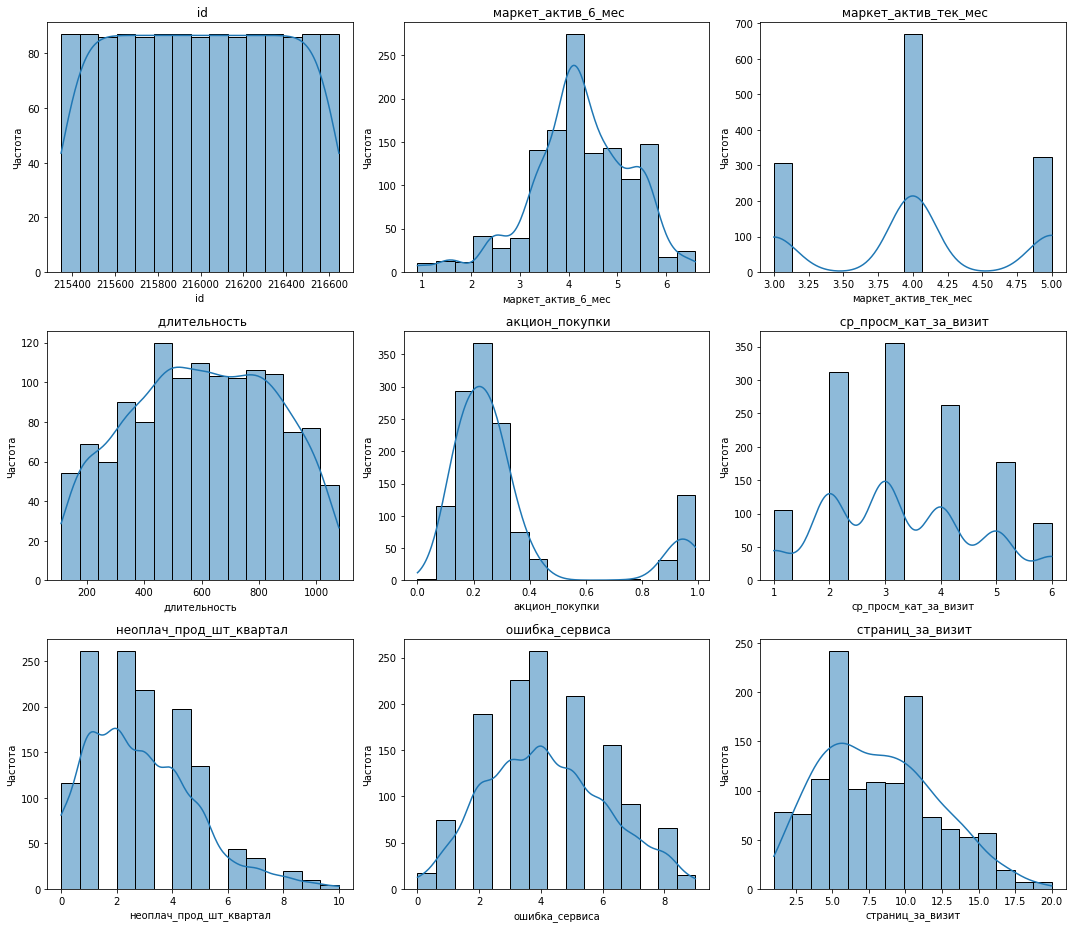

In [155]:
# построим графики для количественных признаков
num_cols = ['id', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акцион_покупки', 
            'ср_просм_кат_за_визит', 'неоплач_прод_шт_квартал', 'ошибка_сервиса', 'cтраниц_за_визит']

# Гистограммы с распределениями
plt.figure(figsize=(15, 13))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)          # 3 строки, 3 столбца
    sns.histplot(df_market_file[col], kde=True, bins=15)
    plt.title(f' {col}')
    plt.xlabel(col)  
    plt.ylabel('Частота')  
plt.tight_layout()
plt.show()

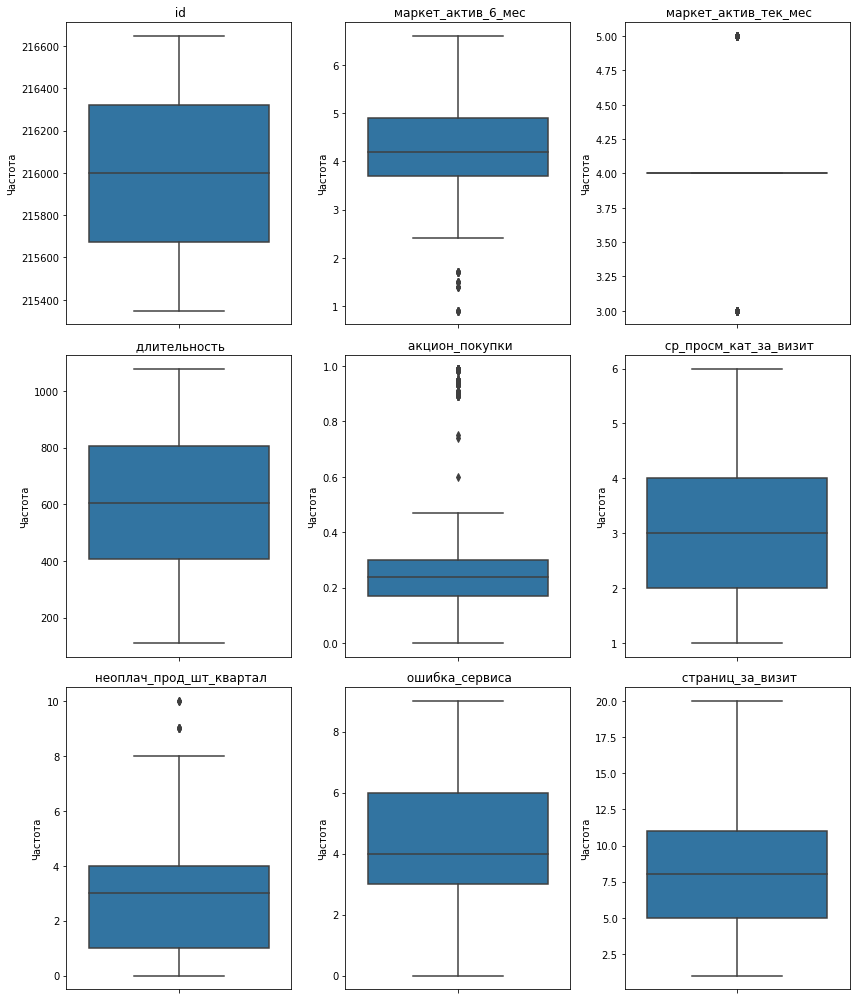

In [156]:
# ящики с усами с выбросами
plt.figure(figsize=(12, 14))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_market_file[col])
    plt.title(f' {col}')
    plt.ylabel('Частота')
plt.tight_layout()
plt.show()

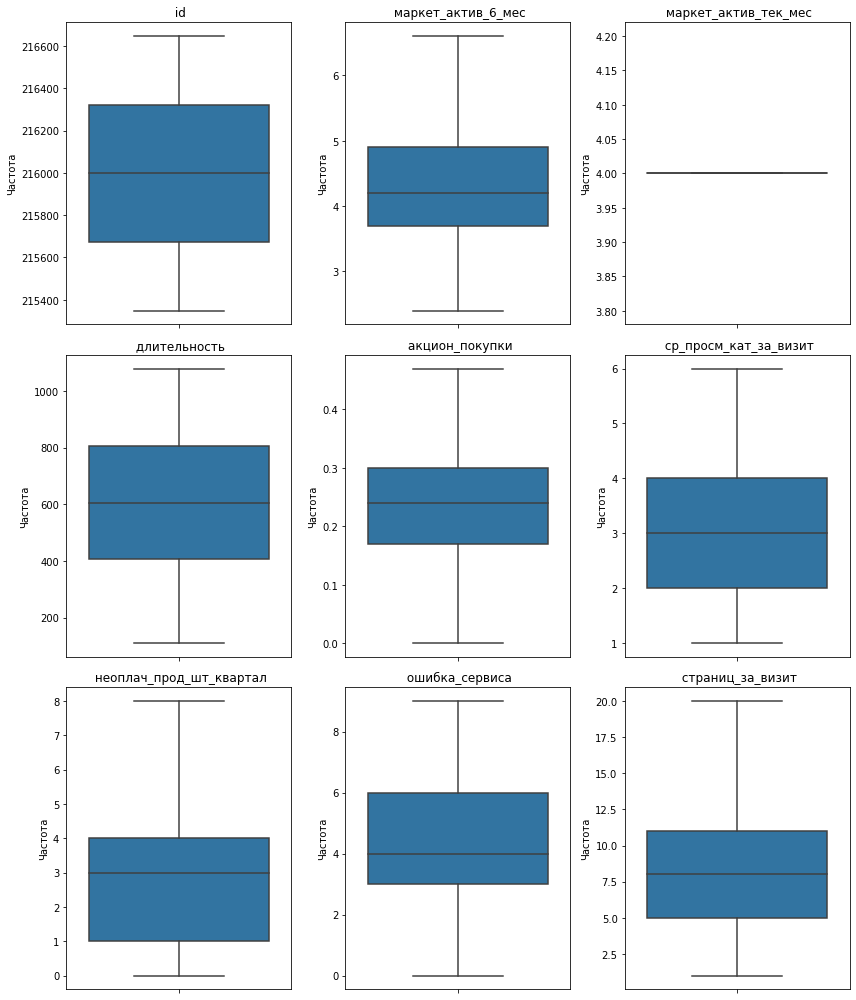

In [157]:
# ящики с усами без выбросов
plt.figure(figsize=(12, 14))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_market_file[col], showfliers=False)
    plt.title(f' {col}')
    plt.ylabel('Частота')
plt.tight_layout()
plt.show()

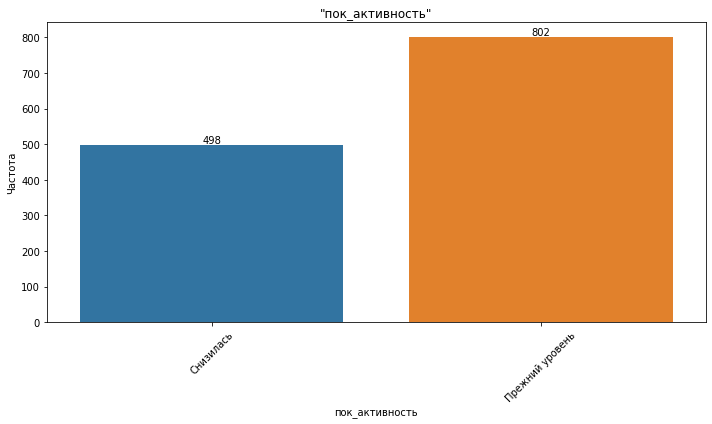

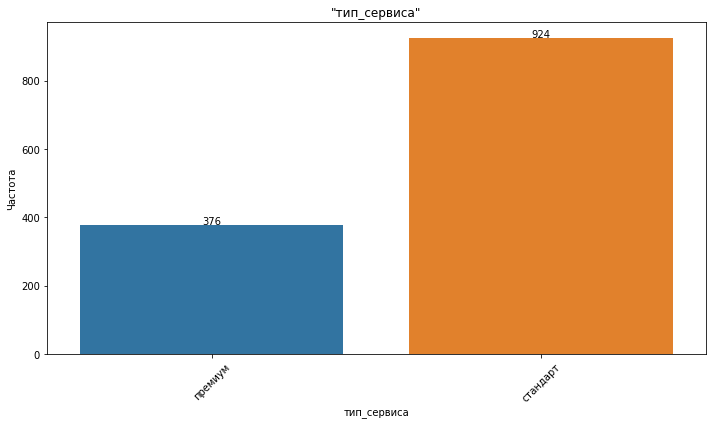

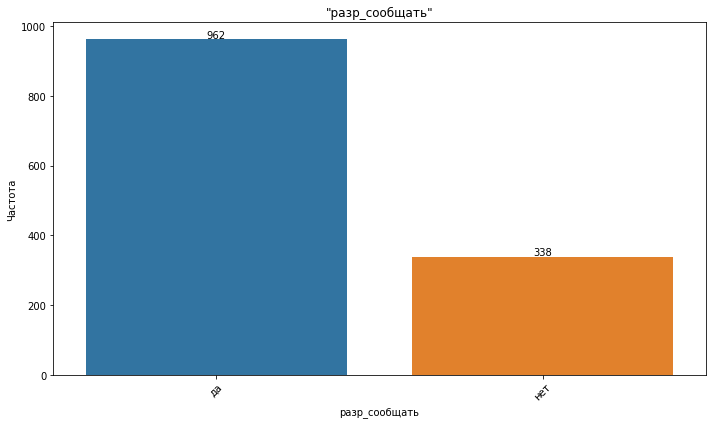

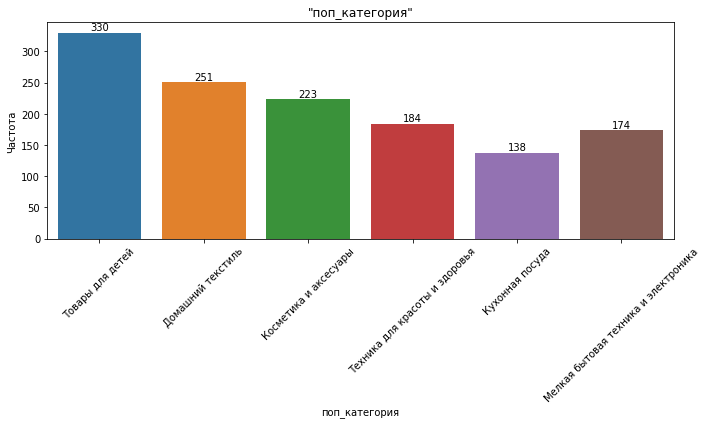

In [158]:
# оценим категоральные признаки построив их графики
cat_cols = df_market_file.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df_market_file, x=col)  # сохраняем график в переменную ax
    plt.title(f'"{col}"')
    plt.ylabel('Частота')
    plt.xticks(rotation=45)

    # Добавим числовые подписи над столбцами
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 3.5,  # немного выше столбика
            s=int(height),
            ha='center'
        )

    plt.tight_layout()
    plt.show()

</font><font color='Blue'><b>Вывод по количественным признакам df_market_file:</b></font><br>
Значения в колонке "id" распределенны равномерно.<br>
Значения в колонке "маркет_актив_6_мес" близки к нормальному распределению 
со смещением вправо. Присутствуют выбросы снизу, ниже значения 2.<br>
Значения в колонке "маркет_актив_тек_мес" в основном сосредоточены в 
значениях 3, 4 и 5. <br>
Значения в колонке "длительность" близки к нормальному распределению.<br>
Значения в колонке "акцион_покупки" в распределении имеют две вершины, с 
максимальными значениями в них около 0.2 и 0.95. Есть выбросы выше значения 0.6<br>
Значения в колонке "ср_просм_кат_за_визит" находятся в диапазоне от 1 до 6.<br>
Значения в колонке "неоплач_прод_шт_квартал" близки к нормальному 
распределению со смещением влево. Есть выбросы выше значения 8.<br>
Значения в колонке "ошибка_сервиса" близки к нормальному распределению.<br>
Значения в колонке "страниц_за_визит" близки к нормальному распределению 
со смещением влево.<br>

</font><font color='Blue'><b>Вывод по категоральным признакам df_market_file:</b></font><br>
Значения в колонке "пок_активность" состоят из двух значений: "Снизилась" (частота 498) 
и "Прежний уровень" (частота 802).<br>
Значения в колонке "тип_сервиса" состоят из двух значений: "премиум" (частота 376) 
и "стандарт" (частота 924)<br>
Значения в колонке "разр_сообщать" состоят из двух значений: "да" (частота 962) 
и "нет" (частота 338)<br>
Значения в колонке "поп_категория" состоят из шести значений: "Товары для детей" (частота 330), 
"Домашний текстиль" (частота 251), "Косметика и аксесуары" (частота 223), "Техника для красоты и здоровья" (частота 184), "Кухонная посуда" (частота 138) и "Мелкая бытовая техника и электроника" (частота 174)<br>

In [159]:
# df_market_money
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [160]:
# оценим количественные данные
df_market_money.describe()

,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


In [161]:
df_market_money['выручка'].value_counts().sort_index()

0.0         6
2758.7      1
2890.0      1
2909.0      1
2952.2      1
           ..
7547.8      1
7557.0      1
7605.3      1
7799.4      1
106862.2    1
Name: выручка, Length: 2776, dtype: int64

Значение 106862.2 является аномальным. Удалим его.

In [162]:
df_market_money = df_market_money[df_market_money['выручка'] != 106862.2]
# сбросим индексы
df_market_money = df_market_money.reset_index(drop=True)
df_market_money['выручка'].value_counts().sort_index()

0.0       6
2758.7    1
2890.0    1
2909.0    1
2952.2    1
         ..
7467.9    1
7547.8    1
7557.0    1
7605.3    1
7799.4    1
Name: выручка, Length: 2775, dtype: int64

In [163]:
df_market_money.describe()

,id,выручка
count,3899.000000,3899.00000
mean,215997.658374,4999.57743
std,375.243472,706.99988
min,215348.000000,0.00000
25%,215673.000000,4590.10000
50%,215998.000000,4957.00000
75%,216322.500000,5363.00000
max,216647.000000,7799.40000


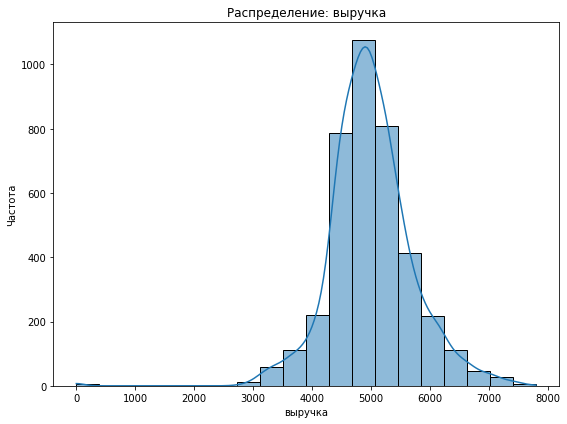

In [164]:
# построим график по "выручка"
plt.figure(figsize=(8, 6))
sns.histplot(df_market_money['выручка'], bins=20, kde=True)
plt.title(f'Распределение: выручка')
plt.xlabel('выручка')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

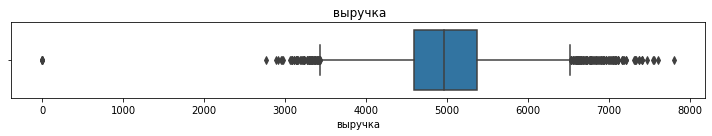

In [165]:
# ящики с усами
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_market_money['выручка'])
plt.title(f' выручка')
plt.tight_layout()
plt.show()

In [166]:
# оценим строчки с 0.0 в выручке
df_market_money[df_market_money['выручка'] == 0.0]

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [167]:
# теперь посмотрим на данные этих id в таблице df_market_file
df_market_file[df_market_file['id'].isin([215348, 215357, 215359])]

,id,пок_активность,тип_сервиса,разр_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акцион_покупки,поп_категория,ср_просм_кат_за_визит,неоплач_прод_шт_квартал,ошибка_сервиса,cтраниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
9,215357,Снизилась,стандарт,да,3.9,5,154,0.0,Техника для красоты и здоровья,3,3,9,5
11,215359,Снизилась,стандарт,да,4.6,5,110,0.0,Домашний текстиль,4,2,4,2


Эти id не пустые, оставим их.

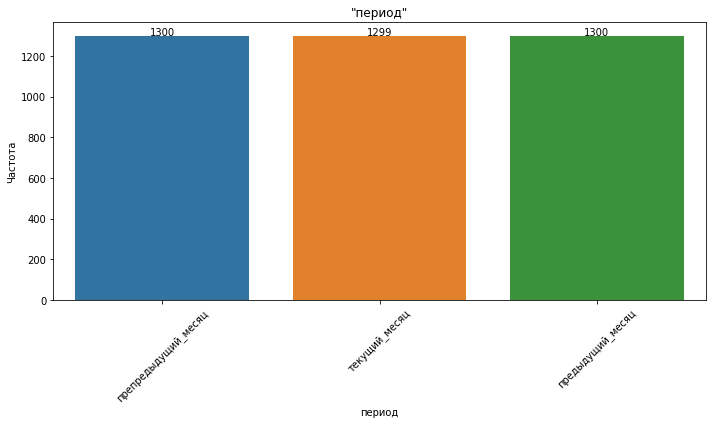

In [168]:
# оценим категоральный признак "период". Построим график
cat_cols = df_market_money.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df_market_money, x=col)  # сохраняем график в переменную ax
    plt.title(f'"{col}"')
    plt.ylabel('Частота')
    plt.xticks(rotation=45)

    # Добавим числовые подписи над столбцами
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 3.5,  # немного выше столбика
            s=int(height),
            ha='center'
        )

    plt.tight_layout()
    plt.show()

</font><font color='Blue'><b>Нехватающее значение в "периоде" "текущий месяц", нашел дальше при обьединении таблиц. </b></font><br>

</font><font color='Blue'><b>Вывод по количественным признакам df_market_money:</b></font><br>
Значения в колонке "выручка" близки к нормальному распределению. Есть выбросы со значением 0.0<br>

</font><font color='Blue'><b>Вывод по категоральным признакам df_market_money:</b></font><br>
Значения в колонке "период" состоят из трех значений: "препредыдущий_месяц" (частота 1300), 
"предыдущий_месяц" (частота 1300) и "текущий_месяц" (частота 1299)<br>

In [169]:
# df_market_time
df_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [170]:
# оценим числовые признаки
df_market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


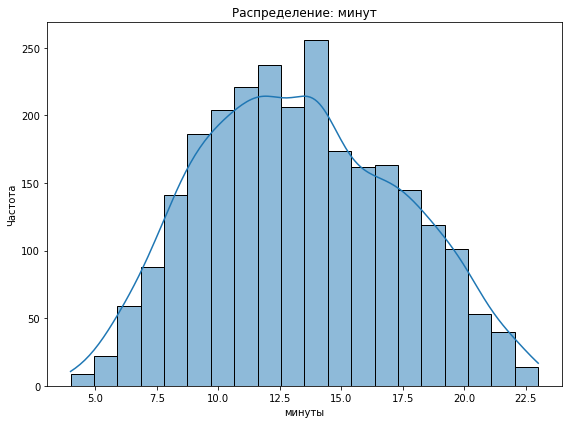

In [171]:
# построим график по "минут"
plt.figure(figsize=(8, 6))
sns.histplot(df_market_time['минут'], bins=20, kde=True)
plt.title(f'Распределение: минут')
plt.xlabel('минуты')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

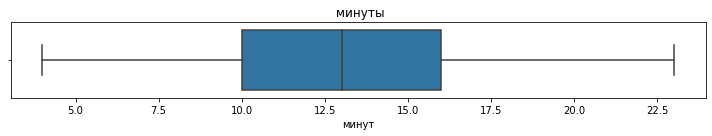

In [172]:
# ящик с усами
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_market_time['минут'])
plt.title(f' минуты')
plt.tight_layout()
plt.show()

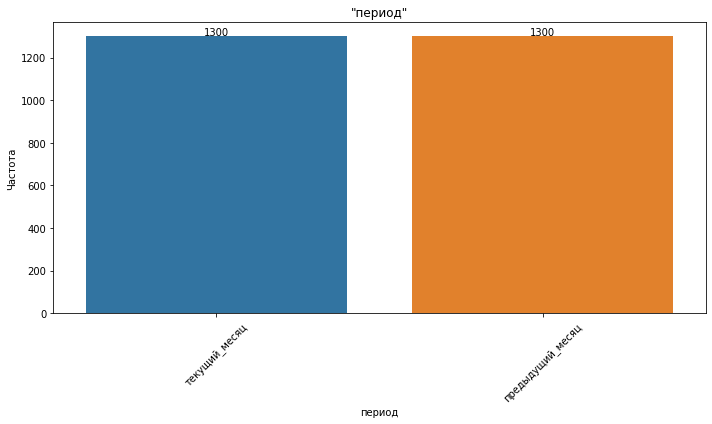

In [173]:
# оценим категоральный признак "период". Построим график
cat_cols = df_market_time.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df_market_time, x=col)  # сохраняем график в переменную ax
    plt.title(f'"{col}"')
    plt.ylabel('Частота')
    plt.xticks(rotation=45)

    # Добавим числовые подписи над столбцами
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 3.5,  # немного выше столбика
            s=int(height),
            ha='center'
        )

    plt.tight_layout()
    plt.show()

</font><font color='Blue'><b>Вывод по количественным признакам df_market_time:</b></font><br>
Значения в колонке "минут" имеет нормальное распределению. Данные находяться в диапазоне от 4.08 до 23<br>

</font><font color='Blue'><b>Вывод по категоральным признакам df_market_time:</b></font><br>
Значения в колонке "период" состоят из двух значений: "текущий_месяц" (частота 1300) и 
"предыдущий_месяц" (частота 1300)<br>

In [174]:
# проанализируем df_money
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [175]:
df_money.describe()

,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


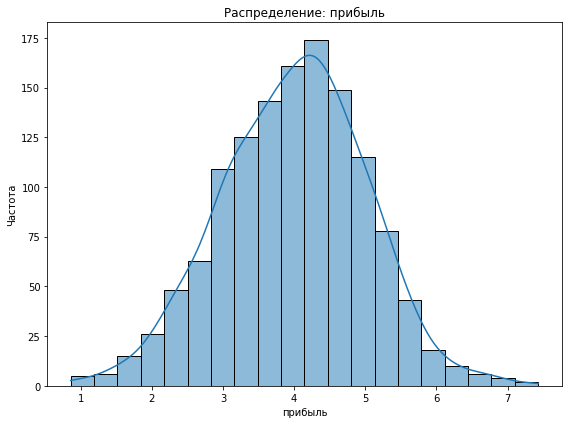

In [176]:
# построим график по "прибыль"
plt.figure(figsize=(8, 6))
sns.histplot(df_money['прибыль'], bins=20, kde=True)
plt.title(f'Распределение: прибыль')
plt.xlabel('прибыль')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

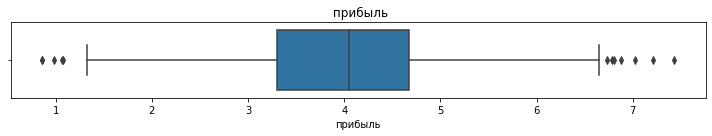

In [177]:
# ящик с усами
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_money['прибыль'])
plt.title(f' прибыль')
plt.tight_layout()
plt.show()

</font><font color='Blue'><b>Вывод по количественным признакам df_money:</b></font><br>
Значения в колонке "прибыль" имеет нормальное распределению. Данные находяться в диапазоне от 0.88 до 7.43<br>

Отберем клиентов с покупательской активностью не менее трёх месяцев. В этом нам поможет таблица df_market_money, она имеет колонку "период" в которой учтены каждый из трех месяцев активности по выручке.

In [178]:
df_market_money.head(10)

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


In [179]:
# 1. Отфильтруем строки с выручкой > 0
df_positive_revenue = df_market_money[df_market_money['выручка'] > 0]

# 2. Посчитаем количество уникальных периодов с выручкой > 0 для каждого клиента
active_clients = df_positive_revenue.groupby('id')['период'].nunique()

# 3. Оставим только тех, у кого активность в 3 и более месяцев
active_ids = active_clients[active_clients >= 3].index

# 4. Отфильтруем основной датафрейм по этим активным id
df_active_clients = df_market_file[df_market_file['id'].isin(active_ids)].reset_index(drop=True)
df_active_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1296 non-null   int64  
 1   пок_активность           1296 non-null   object 
 2   тип_сервиса              1296 non-null   object 
 3   разр_сообщать            1296 non-null   object 
 4   маркет_актив_6_мес       1296 non-null   float64
 5   маркет_актив_тек_мес     1296 non-null   int64  
 6   длительность             1296 non-null   int64  
 7   акцион_покупки           1296 non-null   float64
 8   поп_категория            1296 non-null   object 
 9   ср_просм_кат_за_визит    1296 non-null   int64  
 10  неоплач_прод_шт_квартал  1296 non-null   int64  
 11  ошибка_сервиса           1296 non-null   int64  
 12  cтраниц_за_визит         1296 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 131.8+ KB


</font><font color='Blue'><b>Вывод по исследовательскому анализу:</b></font><br>

</font><font color='Blue'><b>Вывод по количественным признакам df_market_file:</b></font><br>
Значения в колонке "id" распределенны равномерно.<br>
Значения в колонке "маркет_актив_6_мес" близки к нормальному распределению 
со смещением вправо. Присутствуют выбросы снизу, ниже значения 2.<br>
Значения в колонке "маркет_актив_тек_мес" в основном сосредоточены в 
значениях 3, 4 и 5. <br>
Значения в колонке "длительность" близки к нормальному распределению.<br>
Значения в колонке "акцион_покупки" в распределении имеют две вершины, с 
максимальными значениями в них около 0.2 и 0.95. Есть выбросы выше значения 0.6<br>
Значения в колонке "ср_просм_кат_за_визит" находятся в диапазоне от 1 до 6.<br>
Значения в колонке "неоплач_прод_шт_квартал" близки к нормальному 
распределению со смещением влево. Есть выбросы выше значения 8.<br>
Значения в колонке "ошибка_сервиса" близки к нормальному распределению.<br>
Значения в колонке "страниц_за_визит" близки к нормальному распределению 
со смещением влево.<br>

</font><font color='Blue'><b>Вывод по категоральным признакам df_market_file:</b></font><br>
Значения в колонке "пок_активность" состоят из двух значений: "Снизилась" (частота 498) 
и "Прежний уровень" (частота 802).<br>
Значения в колонке "тип_сервиса" состоят из двух значений: "премиум" (частота 376) 
и "стандарт" (частота 924)<br>
Значения в колонке "разр_сообщать" состоят из двух значений: "да" (частота 962) 
и "нет" (частота 338)<br>
Значения в колонке "поп_категория" состоят из шести значений: "Товары для детей" (частота 330), 
"Домашний текстиль" (частота 251), "Косметика и аксесуары" (частота 223), "Техника для красоты и 
здоровья" (частота 184), "Кухонная посуда" (частота 138) и "Мелкая бытовая техника и электроника" 
(частота 174)<br>

</font><font color='Blue'><b>Вывод по количественным признакам df_market_money:</b></font><br>
Значения в колонке "выручка" близки к нормальному распределению. Есть выбросы.<br>

</font><font color='Blue'><b>Вывод по категоральным признакам df_market_money:</b></font><br>
Значения в колонке "период" состоят из трех значений: "препредыдущий_месяц" (частота 1300), 
"предыдущий_месяц" (частота 1300) и "текущий_месяц" (частота 1299)<br>

</font><font color='Blue'><b>Вывод по количественным признакам df_market_time:</b></font><br>
Значения в колонке "минут" имеет нормальное распределению. Данные находяться в диапазоне от 4.08 до 23<br>

</font><font color='Blue'><b>Вывод по категоральным признакам df_market_time:</b></font><br>
Значения в колонке "период" состоят из двух значений: "текущий_месяц" (частота 1300) и 
"предыдущий_месяц" (частота 1300)<br>

</font><font color='Blue'><b>Вывод по количественным признакам df_money:</b></font><br>
Значения в колонке "прибыль" имеет нормальное распределению. Данные находяться в диапазоне от 0.88 до 7.43<br>

</font><font color='Blue'><b>Отобрали клиентов с покупательской активностью от 3-х месяцев в новую таблицу df_active_clients</b></font><br>

Сделаем анализ распределения признаков в зависимости от целевого признака (снижение активности)

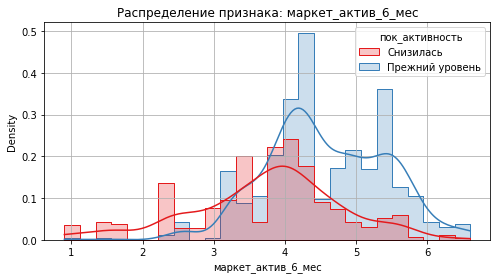

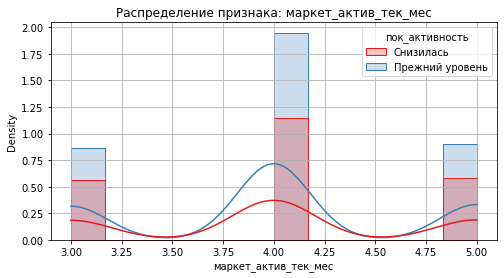

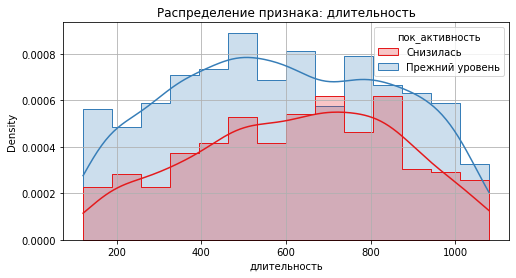

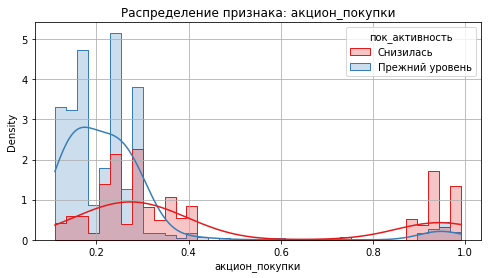

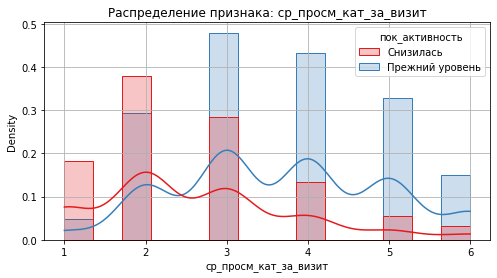

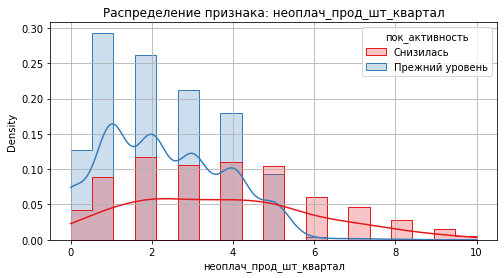

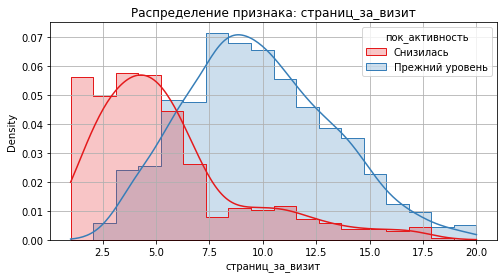

In [180]:
# Разделим клиентов по целевой переменной 'пок_активность'
df_active = df_active_clients[df_active_clients['пок_активность'] == 'Прежний уровень']
df_inactive = df_active_clients[df_active_clients['пок_активность'] == 'Снизилась']

# Построим гистограммы с hue='пок_активность'
features = [
    'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
    'акцион_покупки', 'ср_просм_кат_за_визит', 'неоплач_прод_шт_квартал', 
    'cтраниц_за_визит'
]

for col in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_active_clients, x=col, hue='пок_активность', kde=True, palette='Set1', element='step', stat='density')
    plt.title(f'Распределение признака: {col}')
    plt.grid(True)
    plt.show()

In [181]:
df_active_clients.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акцион_покупки,ср_просм_кат_за_визит,неоплач_прод_шт_квартал,ошибка_сервиса,cтраниц_за_визит
count,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000
mean,215999.464506,4.256404,4.009259,602.967593,0.320069,3.267747,2.841821,4.184414,8.187500
std,374.327860,1.013525,0.696316,249.195823,0.249159,1.355125,1.974074,1.951719,3.978459
min,215349.000000,0.900000,3.000000,121.000000,0.110000,1.000000,0.000000,0.000000,1.000000
25%,215675.750000,3.700000,4.000000,409.500000,0.170000,2.000000,1.000000,3.000000,5.000000
50%,215999.500000,4.200000,4.000000,606.500000,0.240000,3.000000,3.000000,4.000000,8.000000
75%,216323.250000,4.900000,4.000000,806.250000,0.300000,4.000000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000


In [182]:
# Выведем средние значения признаков
features = [
    'cтраниц_за_визит',
    'акцион_покупки',
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'ср_просм_кат_за_визит',
    'неоплач_прод_шт_квартал'
]

comparison = pd.DataFrame({
    'Признак': features,
    'Среднее (Прежний уровень)': [df_active[feat].mean() for feat in features],
    'Среднее (Снизилась)': [df_inactive[feat].mean() for feat in features]
})

comparison

,Признак,Среднее (Прежний уровень),Среднее (Снизилась)
0,cтраниц_за_визит,9.796758,5.574899
1,акцион_покупки,0.238367,0.452713
2,маркет_актив_6_мес,4.570075,3.747166
3,маркет_актив_тек_мес,4.011222,4.006073
4,длительность,590.730673,622.834008
5,ср_просм_кат_за_визит,3.665835,2.621457
6,неоплач_прод_шт_квартал,2.293017,3.732794


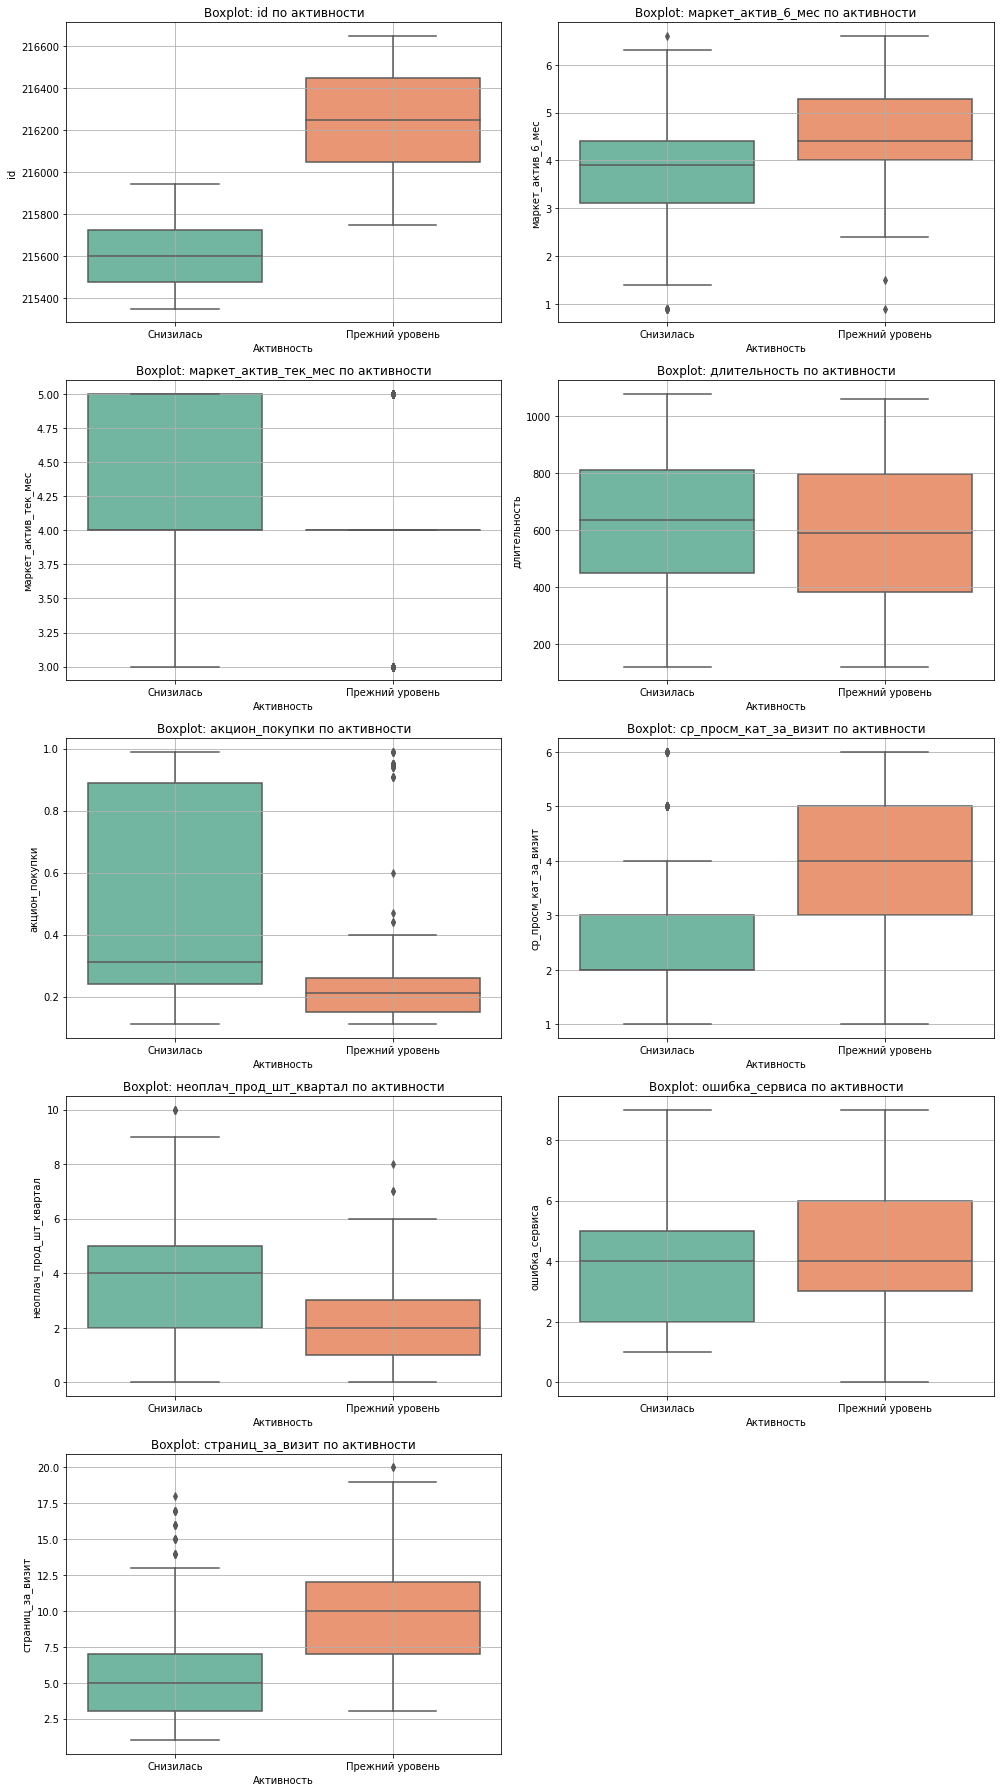

In [183]:
# Определяем признаки для визуализации
features = num_cols  # Используем числовые признаки 

# Рассчитываем количество строк для сетки графиков
n_features = len(features)
n_rows = (n_features + 1) // 2  # Округляем вверх до целого числа

# Размер сетки графиков
plt.figure(figsize=(14, 5 * n_rows))

# Строим boxplot'ы
for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, 2, i)
    sns.boxplot(data=df_active_clients, x='пок_активность', y=feature, palette='Set2')
    plt.title(f'Boxplot: {feature} по активности')
    plt.xlabel('Активность')
    plt.ylabel(feature)
    plt.grid(True)

plt.tight_layout()
plt.show()

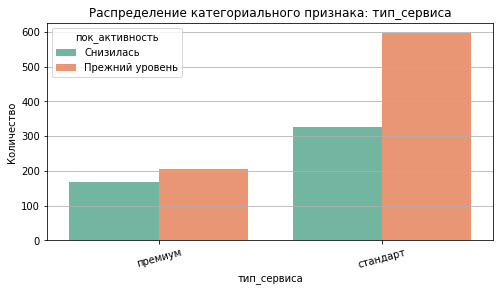

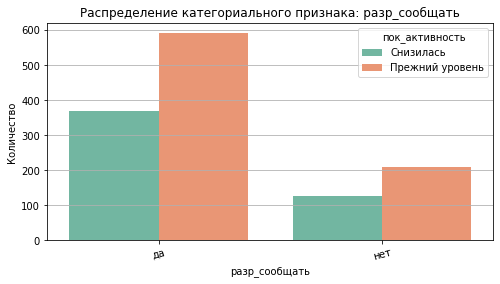

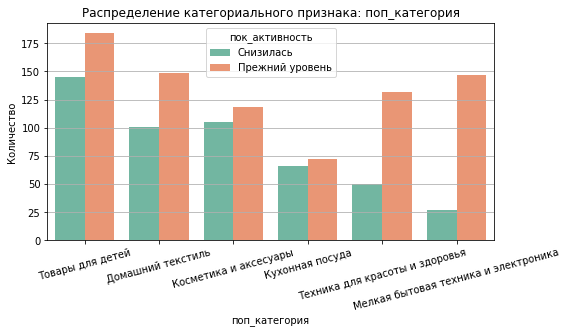

In [184]:
# Для категориальных признаков — столбчатые диаграммы
cat_features = ['тип_сервиса', 'разр_сообщать', 'поп_категория']

for col in cat_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_active_clients, x=col, hue='пок_активность', palette='Set2')
    plt.title(f'Распределение категориального признака: {col}')
    plt.ylabel('Количество')
    plt.xticks(rotation=15)
    plt.grid(True, axis='y')
    plt.show()

</font><font color='Blue'><b>Вывод по исследовательскому аназизу</b></font><br>
Оценивая графики распределения признаков в зависимости от целевого признака (снижение активности),
учтем что группы в целевом признаке находятся в пропорции: "Снизилась" - 498, "Прежний уровень" - 802.<br>
Поэтому, если линия графика "Прежний уровень" выше линии графика "Снизилась" примерно 2 раза, 
то их абсолютные значения примерно равны. Если линии на одном уровне, то группа "Снизилась" преобладает над группой "Прежний уровень" примерно в два раза.<br>

Вывод по количественным признакам:<br>

Среднее значение "маркет_актив_6_мес" за 6 месяцев меньше чем у группы "Прежний уровень" (3.74 против 4.57). На графике видно, что начиная примерно со значения 4 и больше, у группы "Снизилась" заметно меньше такого числа коммуникаций чем у группы "Прежний уровень". <br>
Также видно, что начиная от значения 3 и меньше, заметна тенденция, что у группы "Снизилась" преобладают такие значения коммуникаций, чем у группы "Прежний уровень". Тоесть на группу "Прежний уровень" приходится больше маркейтинговых действий.<br>

Среднее значение "маркет_актив_тек_мес" примерно равно группе "Прежний уровень" (4.006 против 4.011). 
Но на графике виден пониженный уровень у группы "Снизилась" по сравнению с "Прежний уровень".<br>

Среднее значение "длительность" больше чем у группы "Прежний уровень" (623 против 591). Но на графике 
видно что тенденция у обоих групп примерно одинаковая. Явного отклонения нет.<br>

Среднее значение "акцион_покупки" больше чем у группы "Прежний уровень" (0.45 против 0.24). На графике видно, что в диапазоне до значения примерно 0.35 преобладает группа "Прежний уровень", в диапазоне больше этого значения преобладает группа "Снизилась".<br>

Среднее значение "ср_просм_кат_за_визит" меньше чем у группы "Прежний уровень" (2.62 против 3.67).
На графике видно, что группа "Снизилась" преобладает до значения 2.5.<br>

Среднее значение "неоплач_прод_шт_квартал" больше чем у группы "Прежний уровень" (3.73 против 2.29).
График показывает, что со значения 5 и больше преобладает группа "Снизилась".<br>

Среднее значение "cтраниц_за_визит" значительно меньше, чем у группы "Прежний уровень" (5.57 против 9.80). График показывает, что до значения около 6 значительно преобладает группа "Снизилась". От 7 и дальше, уже преобладает группа "Прежний уровень".<br>

Вывод по категоральным признакам:<br>

Признак "тип_сервиса" имеет два значения "премиум" и "стандарт". "Стандарт" распределен соответственно доле каждой группе "Снизилась" (320) и "Прежний уровень" (600). А в "премиум" преобладает группа "Снизилась" (170) по отношению к группе "Прежний уровень" (205).<br>

Признак "разр_сообщать" имеет два значения "да" и "нет". Оба значения распределенны соответсвенно 
доле каждой группы "Снизилась" - 498, "Прежний уровень" - 802. <br>

Признак "поп_категория" имеет 6 значений. <br>

Группа "Снизилась" имеет следующее распределение от наибольшего к наименьшему: "Товары для детей",
"Косметика и аксесуары", "Домашний текстиль", "Кухонная посуда", "Техника для красоты и здоровья" и 
"Мелкая бытовая техника и электроника"<br>

Группа "Прежний уровень" имеет следующее распределение от наибольшего к наименьшему: "Товары для детей", "Домашний текстиль", "Мелкая бытовая техника и электроника", "Техника для красоты и здоровья", "Косметика и аксесуары" и "Кухонная посуда". <br>

Различия в соотношении групп ("Снизилась" - 498, "Прежний уровень" - 802) следующие:
Доля группы "Снизилась" преобладает в категориях "Косметика и аксесуары" и "Кухонная посуда".<br>
Доля группы "Снизилась" явно уступает в категории "Мелкая бытовая техника и электроника".<br>
В остальных категориях: "Товары для детей", "Домашний текстиль" и "Техника для красоты и здоровья", 
распределение примерно соответствует доле каждой группы.<br>

Портрет покупателя, снижающего активность<br>
Количественные особенности:<br>
Меньше маркетинговых касаний за 6 месяцев (маркет_актив_6_мес): На менее активных клиентов приходилось меньше коммуникаций.<br>
Чуть ниже маркетинг в текущем месяце (маркет_актив_тек_мес): Снижение активности может быть связано с ослаблением актуального маркетинга.<br>
Дольше пользуются сервисом (длительность): Это не новички — уходят даже те, кто был лоялен долгое время.<br>
Больше доля акционных покупок (акцион_покупки): Чувствительны к скидкам — возможен интерес только к акциям.<br>
Меньше категорий в среднем за визит (ср_просм_кат_за_визит) и меньше страниц за визит (страниц_за_визит): Меньшая вовлечённость и интерес к ассортименту.<br>
Больше неоплаченных товаров (неоплач_прод_шт_квартал): Возможны проблемы с оформлением заказов или неудовлетворенность.<br>

Категориальные особенности:<br>
Преобладание тарифа "премиум" среди снижающих активность: Возможно, ожидания от тарифа не оправданы.
Популярные категории у снижающих активность: "Косметика и аксессуары", "Кухонная посуда". Вероятно, менее регулярные или менее необходимые товары.<br>
Недостаточное присутствие в категории "Мелкая бытовая техника и электроника": Те, кто покупает технику, остаются активными дольше. <br>
Вывод:<br>
Покупатели, у которых снизилась активность, чаще:<br>
Меньше взаимодействуют с маркетингом,<br>
Реже просматривают товары,<br>
Чувствительны к акциям,<br>
Столкнулись с неудовлетворительным опытом (брошенные корзины),<br>
Оформляли покупки в "премиум" сегменте, но не получили ценности.<br>

### Шаг 4. Объединение таблиц

In [185]:
df_active_clients
df_market_money
df_market_time

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13
...,...,...,...
2595,216645,текущий_месяц,18
2596,216646,предыдущий_месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10


In [186]:
print(df_active_clients.info())
df_active_clients.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1296 non-null   int64  
 1   пок_активность           1296 non-null   object 
 2   тип_сервиса              1296 non-null   object 
 3   разр_сообщать            1296 non-null   object 
 4   маркет_актив_6_мес       1296 non-null   float64
 5   маркет_актив_тек_мес     1296 non-null   int64  
 6   длительность             1296 non-null   int64  
 7   акцион_покупки           1296 non-null   float64
 8   поп_категория            1296 non-null   object 
 9   ср_просм_кат_за_визит    1296 non-null   int64  
 10  неоплач_прод_шт_квартал  1296 non-null   int64  
 11  ошибка_сервиса           1296 non-null   int64  
 12  cтраниц_за_визит         1296 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 131.8+ KB
None


,id,пок_активность,тип_сервиса,разр_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акцион_покупки,поп_категория,ср_просм_кат_за_визит,неоплач_прод_шт_квартал,ошибка_сервиса,cтраниц_за_визит
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4


In [187]:
print(df_market_money.info())
df_market_money.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3899 non-null   int64  
 1   период   3899 non-null   object 
 2   выручка  3899 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None


,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [188]:
print(df_market_time.info())
df_market_time.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None


,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


In [189]:
# разворот таблицы df_market_money
money_pivot = df_market_money.pivot(index='id', columns='период', values='выручка').reset_index()

# разворот таблицы df_market_time
time_pivot = df_market_time.pivot(index='id', columns='период', values='минут').reset_index()

# обьединяем с df_market_file, сначала с выручкой
df_merged = df_active_clients.merge(money_pivot, on='id', how='left')

# затем с временем
df_merged = df_merged.merge(time_pivot, on='id', how='left')

print(df_merged.shape)
df_merged.head()

(1296, 18)


,id,пок_активность,тип_сервиса,разр_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акцион_покупки,поп_категория,ср_просм_кат_за_визит,неоплач_прод_шт_квартал,ошибка_сервиса,cтраниц_за_визит,предыдущий_месяц_x,препредыдущий_месяц,текущий_месяц_x,предыдущий_месяц_y,текущий_месяц_y
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [190]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1296 non-null   int64  
 1   пок_активность           1296 non-null   object 
 2   тип_сервиса              1296 non-null   object 
 3   разр_сообщать            1296 non-null   object 
 4   маркет_актив_6_мес       1296 non-null   float64
 5   маркет_актив_тек_мес     1296 non-null   int64  
 6   длительность             1296 non-null   int64  
 7   акцион_покупки           1296 non-null   float64
 8   поп_категория            1296 non-null   object 
 9   ср_просм_кат_за_визит    1296 non-null   int64  
 10  неоплач_прод_шт_квартал  1296 non-null   int64  
 11  ошибка_сервиса           1296 non-null   int64  
 12  cтраниц_за_визит         1296 non-null   int64  
 13  предыдущий_месяц_x       1296 non-null   float64
 14  препредыдущий_месяц     

In [191]:
df_merged[df_merged['текущий_месяц_x'].isna()]

,id,пок_активность,тип_сервиса,разр_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акцион_покупки,поп_категория,ср_просм_кат_за_визит,неоплач_прод_шт_квартал,ошибка_сервиса,cтраниц_за_визит,предыдущий_месяц_x,препредыдущий_месяц,текущий_месяц_x,предыдущий_месяц_y,текущий_месяц_y


In [192]:
#df_market_money[df_market_money['id'] == 215380]

Nan "текущий_месяц_x" получился из-за отсутствия такой строки у этого 'id' в df_market_money. Считаю уместным заменить его медианным значением df_merged.

В начале шага заменил df_market_file на df_active_clients

In [193]:
# заменим на медиану и проверим
#df_merged['текущий_месяц_x'] = df_merged['текущий_месяц_x'].fillna(df_merged['текущий_месяц_x'].median())
df_merged['текущий_месяц_x'].isna().sum()

0

In [194]:
df_merged[df_merged['id'] == 215380]

,id,пок_активность,тип_сервиса,разр_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акцион_покупки,поп_категория,ср_просм_кат_за_визит,неоплач_прод_шт_квартал,ошибка_сервиса,cтраниц_за_визит,предыдущий_месяц_x,препредыдущий_месяц,текущий_месяц_x,предыдущий_месяц_y,текущий_месяц_y


In [195]:
# переименуем назв столбцов для удобного анализа
new_columns = {
    'предыдущий_месяц_x': 'предыдущ_мес_money',
    'препредыдущий_месяц': 'препредыдущ_мес_money',
    'текущий_месяц_x': 'текущ_мес_money',
    'предыдущий_месяц_y': 'предыдущ_мес_time',
    'текущий_месяц_y': 'текущ_мес_time'
}
df_merged = df_merged.rename(columns=new_columns)
df_merged.head()

,id,пок_активность,тип_сервиса,разр_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акцион_покупки,поп_категория,ср_просм_кат_за_визит,неоплач_прод_шт_квартал,ошибка_сервиса,cтраниц_за_визит,предыдущ_мес_money,препредыдущ_мес_money,текущ_мес_money,предыдущ_мес_time,текущ_мес_time
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


Обьединили таблицы: df_market_file, df_market_money и df_market_time. Заполнили одно значение Nan на медиану. Изменили несколько названий колонок для удобства.

### Шаг 5. Корреляционный анализ
Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделаем выводы о мультиколлинеарности и при необходимости устраним её.

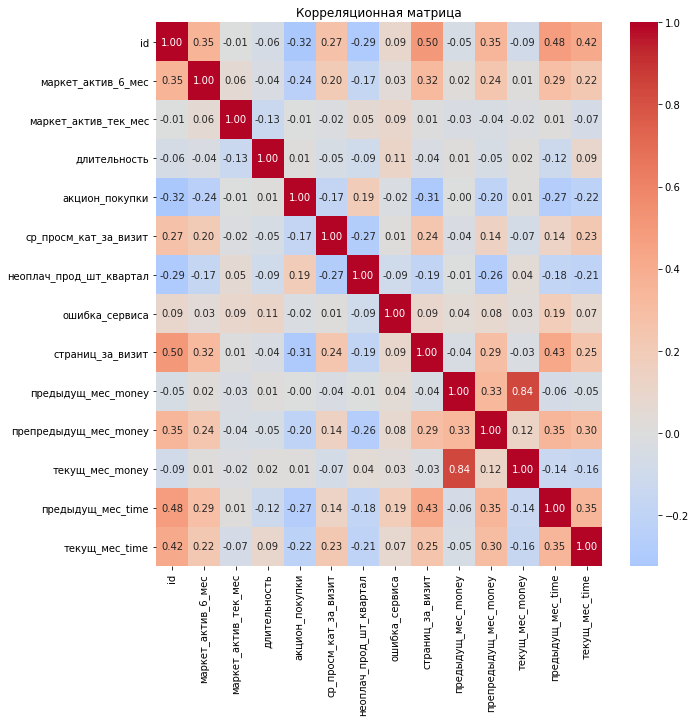

In [196]:
# Только числовые признаки
num_cols = df_merged.select_dtypes(include='number').columns
corr_matrix = df_merged[num_cols].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.show()

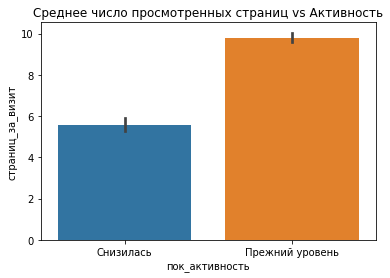

In [197]:
sns.barplot(data=df_merged, x='пок_активность', y='cтраниц_за_визит')
plt.title('Среднее число просмотренных страниц vs Активность')
plt.show()

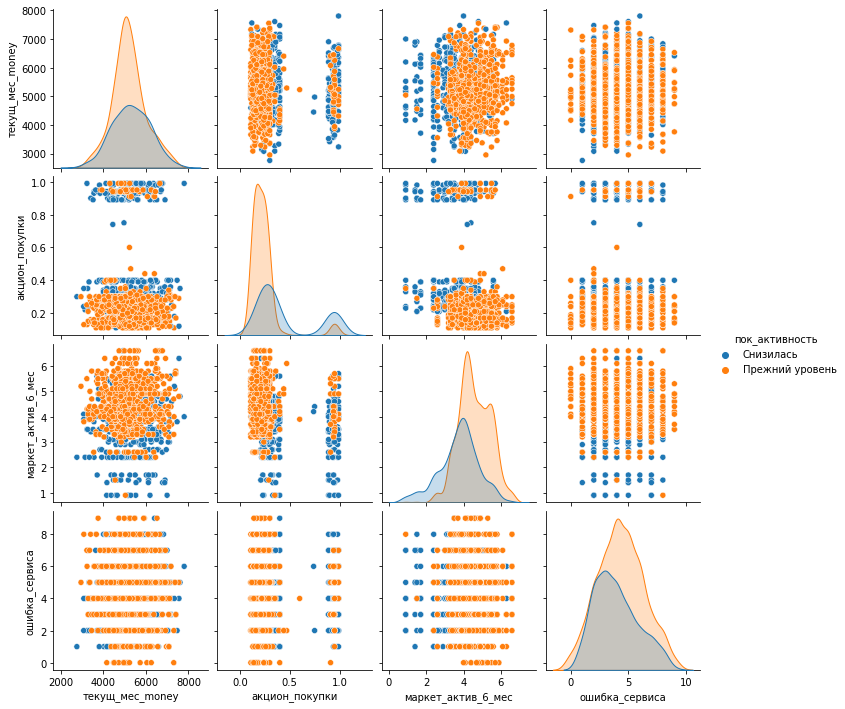

In [198]:
sns.pairplot(
    df_merged[[
        'текущ_мес_money', 
        'акцион_покупки', 
        'маркет_актив_6_мес', 
        'ошибка_сервиса', 
        'пок_активность'
    ]], 
    hue='пок_активность'
)


</font><font color='Blue'><b>Вывод по корреляции:</b></font><br>
В матрице корреляции есть только одно максимальное значение 0.84 (сильное) между 'текущ_мес_money' и 'предыдущ_мес_money' далее только значение 0.5 большое, остальные меньше. Так как это одно значение, оно останется.<br>

### Шаг 6. Использование пайплайнов

In [199]:
# Заменим латинскую 'c' на кириллическую 'с' в названии колонки "страниц_за_визит"
df_merged.columns = df_merged.columns.str.replace('^cтраниц', 'страниц', regex=True)

In [201]:
# Версия после проверки V1
# Фиксируем случайность
RANDOM_STATE = 42

# Создаём копию данных для модели, чтобы не повредить оригинал
df_model = df_merged.copy()

# Удалим пропуски в целевой
df_model = df_model.dropna(subset=['пок_активность'])

# Переводим строки в числа, только если они ещё не закодированы
if df_model['пок_активность'].dtype == 'object':
    df_model['пок_активность'] = df_model['пок_активность'].map({'Прежний уровень': 0, 'Снизилась': 1})

# Проверим размерность
print("Размерность после фильтрации:", df_model.shape)
print("Уникальные значения целевой переменной:", df_model['пок_активность'].unique())

# Целевая переменная и признаки
target = 'пок_активность'
X = df_model.drop(columns=['id', target])
y = df_model[target]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=RANDOM_STATE
)

# Категориальные и числовые признаки
cat_ohe_cols = ['тип_сервиса', 'разр_сообщать', 'поп_категория']
cat_ord_cols = ['ошибка_сервиса']
num_cols = [
    'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
    'акцион_покупки', 'ср_просм_кат_за_визит', 'неоплач_прод_шт_квартал',
    'страниц_за_визит', 'предыдущ_мес_money', 'препредыдущ_мес_money',
    'текущ_мес_money', 'предыдущ_мес_time', 'текущ_мес_time'
]

# Пайплайн для OneHotEncoder
ohe_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])

# Пайплайн для OrdinalEncoder
ord_pipe = Pipeline([
    ('imputer_before', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('imputer_after', SimpleImputer(strategy='most_frequent'))
])

# Общий трансформер
preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, cat_ohe_cols),
    ('ord', ord_pipe, cat_ord_cols),
    ('num', MinMaxScaler(), num_cols)
], remainder='passthrough')

# Общий пайплайн
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=RANDOM_STATE))  
])

# Сетка параметров для поиска
param_grid = [
    {
        'model': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'model__max_depth': [3, 5, 7],
        'model__max_features': [5, 10, None],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },
    {
        'model': [LogisticRegression(max_iter=1000, solver='liblinear')],
        'model__C': [0.1, 1, 10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },
    {
        'model': [SVC(probability=True)],
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf'],
        'preprocessor__num': [StandardScaler()]
    }
]

# RandomizedSearchCV
search = RandomizedSearchCV(
    pipe,
    param_distributions=param_grid,
    n_iter=30,
    scoring='f1',
    cv=5,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# Обучение модели
search.fit(X_train, y_train)

# Сохраняем лучшую модель
best_model = search.best_estimator_

# Вывод результатов
print("Лучшая модель:\n", best_model)
print("Лучшее F1 на кросс-валидации:", search.best_score_)

# Предсказания и финальная метрика
y_pred = search.predict(X_test)
print("F1 на тесте:", f1_score(y_test, y_pred))

Размерность после фильтрации: (1296, 18)
Уникальные значения целевой переменной: [1 0]
Лучшая модель:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['тип_сервиса',
                                                   'разр_сообщать',
                                                   '

</font><font color='Blue'><b>Вывод:</b></font><br>
На основе пайплайна нашли лучшую модель: <br>
SVC(C=1, probability=True)<br>
Лучшее F1 на кросс-валидации: 0.8206403550113051<br>
F1 на тесте: 0.8789237668161434<br>

В пайплайне использовали ColumnTransformer, для кодирования использовали разные кодировщики для количественных признаков (масштабирование: StandardScaler(), MinMaxScaler()) и категоральных признаков (кодирование: OneHotEncoder, OrdinalEncoder).<br>
Обучили четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC() указав для них гиперпараметры.<br>
Использовали общий пайплайн для всех моделей.<br>
Использовали метрику f1 для поиска лучшей модели. Так как:<br>
F1-мера — это среднее гармоническое между точностью (precision) и полнотой (recall)<br>

### Шаг 7. Анализ важности признаков
Оценим важность признаков для лучшей модели и постройте график важности с помощью метода SHAP.<br>
Сделаем выводы о значимости признаков:<br>
какие признаки мало значимы для модели;<br>
какие признаки сильнее всего влияют на целевой признак;<br>
как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.<br>

Получим обученную модель и данные после препроцессинга

  0%|          | 0/100 [00:00<?, ?it/s]

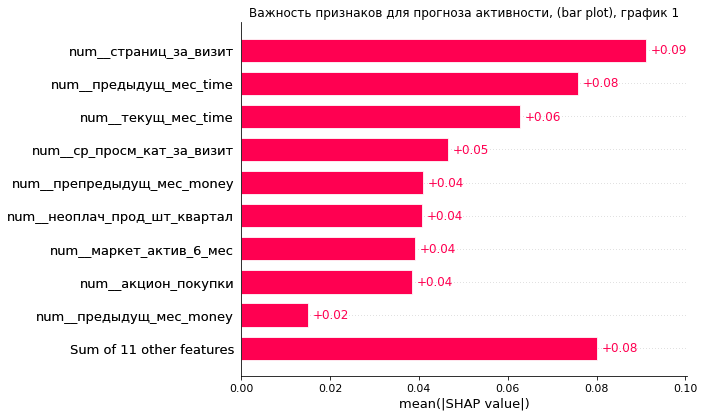

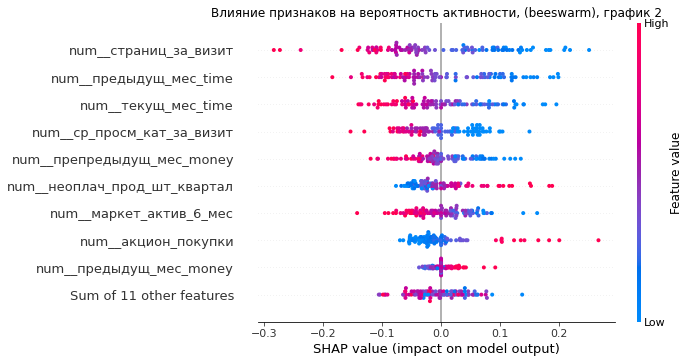

In [202]:
# Подготовка данных и модели
# Берем обученную модель и препроцессор
best_pipe = search.best_estimator_
preprocessor = best_pipe.named_steps['preprocessor']
model = best_pipe.named_steps['model']

# Создание подвыборки и преобразование
# Подвыборка из 100 объектов для оценки важности
X_sample = X_train.sample(n=100, random_state=RANDOM_STATE)

# Преобразуем подвыборку с помощью preprocessor
X_sample_array = preprocessor.transform(X_sample)

# SHAP KernelExplainer
# KernelExplainer требует predict_proba
explainer = shap.KernelExplainer(model.predict_proba, X_sample_array)

# Расчёт значений shap для этой подвыборки
shap_values = explainer.shap_values(X_sample_array, nsamples=100)

# Получим названия признаков после преобразования
feature_names = preprocessor.get_feature_names_out()

# Среднее значение вероятности класса 1
base_values = model.predict_proba(X_sample_array)[:, 1].mean()

# Создание Explanation-объекта для класса 1 (например, "снизилась активность")
shap_exp = shap.Explanation(
    values=shap_values[1], 
    feature_names=feature_names, 
    data=X_sample_array,
    base_values=np.repeat(base_values, X_sample_array.shape[0])
)

# График важности признаков (bar plot)
shap.plots.bar(shap_exp, show=False)
plt.title("Важность признаков для прогноза активности, (bar plot), график 1")
plt.show()

# Более подробный график распределения влияния (beeswarm)
shap.plots.beeswarm(shap_exp, show=False)
plt.title("Влияние признаков на вероятность активности, (beeswarm), график 2")
plt.show()

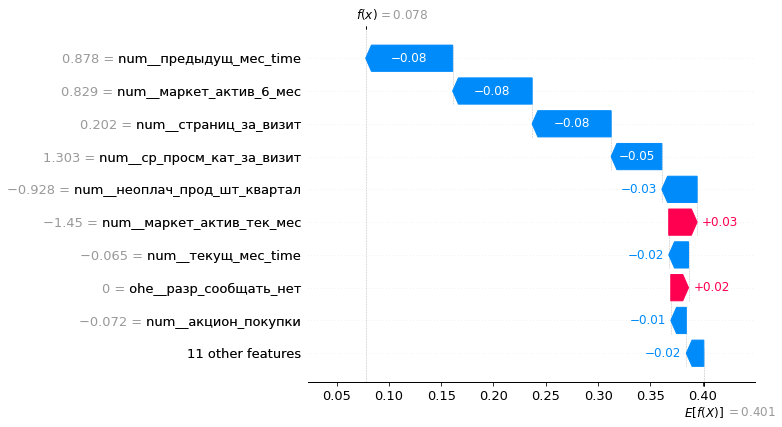

In [203]:
# waterfall-график для наблюдения отдельного значения
shap.plots.waterfall(shap_exp[0])

</font><font color='Blue'><b>Вывод о значимости признаков на целевой признак:</b></font><br>
Из bar plot (график 1) видно, что наибольший вклад в предсказание имеют:<br>
num_страниц_за_визит —        +0.09 (данные могут незначительно отличаться)<br>
num_предыдущ_мес_time —       +0.07 (данные могут незначительно отличаться)<br>
num_текущ_мес_time —          +0.06 (данные могут незначительно отличаться)<br>
num_ср_просм_кат_за_визит —   +0.05 (данные могут незначительно отличаться)<br>
Также значимыми (в меньшей степени) являются:<br>
num_препредыдущ_мес_money -   +0.04 (данные могут незначительно отличаться)<br>
num_неоплач_прод_шт_квартал - +0.04 (данные могут незначительно отличаться)<br>
num_аукцион_покупки           +0.04 (данные могут незначительно отличаться)<br>
num_маркет_актив_6_мес -      +0.04 (данные могут незначительно отличаться)<br>

Это можно также подтвердить по beeswarm-графику (график 2): именно эти признаки дают наибольший разброс значений SHAP (то есть важность + влияние на предсказание).<br>

Наименее важными признаками являются:<br>
num_предыдущ_мес_money - +0.01 и остальные 11 признаков объединены в "sum of 11 other features" — их влияние незначительное в среднем.<br>

Моделирование:<br>
Можно попробовать упростить модель, оставив признаки с SHAP > 0.03–0.04 — это улучшит интерпретируемость и устойчивость.<br>
Низкозначимые признаки можно исключить или объединить.<br>

Бизнес-решения:<br>
Если падает страниц_за_визит - клиент уходит.<br>
Действие: активировать персональные предложения, push-уведомления, ретаргетинг.<br>
Если снижается предыдущ_мес_time и текущ_мес_time<br>
Действие: запуск акций по интересным категориям, визуальные подсказки, рекомендации на сайте.<br>
Если акцион_покупки высоко — клиент уходит без акций<br>
Действие: включить бонусы за регулярные покупки, предлагать "пакеты" без скидки, использовать кэшбек вместо дисконта.<br>

Причинность vs. Корреляция<br>
Признак: num_страниц_за_визит, num_предыдущ_мес_time, num_текущ_мес_time, num_ср_просм_кат_за_визит, num_неоплач_прод_шт_квартал. Вероятная природа: причинно-следственный.	<br>
Признак: num_препредыдущ_мес_money, num_аукцион_покупки, num_маркет_актив_6_мес.	Вероятная природа: Корреляция.<br>

### Шаг 8. Сегментация покупателей
Выполним сегментацию покупателей. Используем результаты моделирования и данные о прибыльности покупателей.<br>
Выберем группу покупателей и предложим, как увеличить её покупательскую активность: <br>
Проведем графическое и аналитическое исследование группы покупателей.<br>
Сделайте предложения по работе с сегментом для увеличения покупательской активности.<br>
Сделайте выводы о сегментах:<br>
какой сегмент взяли для дополнительного исследования.<br>
какие предложения вы сделали и почему.<br>
Cегменты:<br>
Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.<br>
Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.<br>
Группа клиентов, которые покупают товары из категории «Товары для себя» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».<br>
Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.<br>

In [204]:
best_model = search.best_estimator_

X = df_merged.drop(columns=['пок_активность'], errors='ignore')

preprocessor = best_model.named_steps['preprocessor']
model = best_model.named_steps['model']

X_processed = preprocessor.transform(X)
df_merged['predicted_activity'] = model.predict(X_processed)

df_merged['profit'] = df_merged['текущ_мес_money'] - df_merged['предыдущ_мес_money']

cond_дети = df_merged['поп_категория'] == 'Товары для детей'
cond_техника = df_merged['поп_категория'].isin([
    'Мелкая бытовая техника и электроника', 
    'Техника для красоты и здоровья'
])
cond_акционные_рисковые = (df_merged['акцион_покупки'] > 0.75) & (df_merged['predicted_activity'] == 1)  # если 1 - "Снизилась"
profit_threshold = df_merged['profit'].quantile(0.75)
cond_прибыльные_рисковые = (df_merged['profit'] >= profit_threshold) & (df_merged['predicted_activity'] == 1)

df_merged['segment'] = 'Другие'
df_merged.loc[cond_дети, 'segment'] = 'Покупают для детей'
df_merged.loc[cond_техника, 'segment'] = 'Покупают технику'
df_merged.loc[cond_акционные_рисковые, 'segment'] = 'Акционные с риском'
df_merged.loc[cond_прибыльные_рисковые, 'segment'] = 'Прибыльные с риском'

segment_analysis = df_merged.groupby('segment').agg({
    'id': 'count',
    'текущ_мес_money': 'mean',
    'profit': 'mean',
    'длительность': 'mean',
    'ср_просм_кат_за_визит': 'mean'
}).rename(columns={
    'id': 'count',
    'текущ_мес_money': 'avg_revenue',
    'profit': 'avg_profit',
    'длительность': 'avg_duration',
    'ср_просм_кат_за_визит': 'avg_views_per_visit'
}).reset_index()

display(segment_analysis)

# Выделяем для анализа сегмент 'Акционные с риском'
df_promo = df_merged[df_merged['segment'] == 'Акционные с риском'].copy()
df_promo = df_promo.reset_index(drop=True)
df_promo.head()

,segment,count,avg_revenue,avg_profit,avg_duration,avg_views_per_visit
0,Акционные с риском,96,5150.248958,161.728125,592.354167,2.541667
1,Другие,502,5313.104781,235.364741,592.968127,3.310757
2,Покупают для детей,270,5035.023333,257.260370,582.600000,3.433333
3,Покупают технику,334,5142.578144,276.191916,612.568862,3.455090
4,Прибыльные с риском,94,5849.921277,864.527660,691.595745,2.638298


,id,пок_активность,тип_сервиса,разр_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акцион_покупки,поп_категория,ср_просм_кат_за_визит,...,ошибка_сервиса,страниц_за_визит,предыдущ_мес_money,препредыдущ_мес_money,текущ_мес_money,предыдущ_мес_time,текущ_мес_time,predicted_activity,profit,segment
0,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,...,6,4,6158.0,4793.0,6610.4,11,13,1,452.4,Акционные с риском
1,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,...,3,2,5807.5,4594.0,5872.5,8,11,1,65.0,Акционные с риском
2,215364,Снизилась,премиум,да,4.3,4,708,0.98,Домашний текстиль,3,...,3,3,5795.5,4942.0,5484.8,11,9,1,-310.7,Акционные с риском
3,215365,Снизилась,стандарт,да,3.9,4,167,0.95,Техника для красоты и здоровья,6,...,2,5,4577.0,4190.0,4799.3,6,10,1,222.3,Акционные с риском
4,215373,Снизилась,премиум,нет,3.8,3,811,0.90,Товары для детей,2,...,5,3,4632.0,4293.0,5161.1,10,8,1,529.1,Акционные с риском


In [205]:
df_promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       96 non-null     int64  
 1   пок_активность           96 non-null     object 
 2   тип_сервиса              96 non-null     object 
 3   разр_сообщать            96 non-null     object 
 4   маркет_актив_6_мес       96 non-null     float64
 5   маркет_актив_тек_мес     96 non-null     int64  
 6   длительность             96 non-null     int64  
 7   акцион_покупки           96 non-null     float64
 8   поп_категория            96 non-null     object 
 9   ср_просм_кат_за_визит    96 non-null     int64  
 10  неоплач_прод_шт_квартал  96 non-null     int64  
 11  ошибка_сервиса           96 non-null     int64  
 12  страниц_за_визит         96 non-null     int64  
 13  предыдущ_мес_money       96 non-null     float64
 14  препредыдущ_мес_money    96 

In [206]:
df_promo.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акцион_покупки,ср_просм_кат_за_визит,неоплач_прод_шт_квартал,ошибка_сервиса,страниц_за_визит,предыдущ_мес_money,препредыдущ_мес_money,текущ_мес_money,предыдущ_мес_time,текущ_мес_time,predicted_activity,profit
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0,96.000000
mean,215591.187500,3.462500,3.958333,592.354167,0.941979,2.541667,4.229167,3.739583,4.177083,4988.520833,4631.187500,5150.248958,9.927083,10.218750,1.0,161.728125
std,209.197731,1.074415,0.679267,232.880407,0.034201,1.204524,2.609614,1.577772,2.092567,750.086988,231.378265,814.619880,2.584345,2.616559,0.0,279.588206
min,215351.000000,0.900000,3.000000,167.000000,0.890000,1.000000,0.000000,1.000000,1.000000,3188.000000,4098.000000,3232.200000,5.000000,4.000000,1.0,-551.200000
25%,215444.250000,3.000000,3.750000,447.750000,0.930000,2.000000,2.000000,3.000000,2.750000,4506.000000,4443.500000,4617.875000,8.000000,9.000000,1.0,-24.050000
50%,215560.000000,3.700000,4.000000,554.000000,0.940000,2.000000,4.000000,3.000000,4.000000,5119.250000,4661.500000,5180.150000,10.000000,10.000000,1.0,184.600000
75%,215677.000000,4.100000,4.000000,791.750000,0.980000,3.000000,6.000000,5.000000,5.250000,5438.375000,4794.250000,5679.925000,11.000000,11.000000,1.0,385.125000
max,216564.000000,5.700000,5.000000,1064.000000,0.990000,6.000000,10.000000,8.000000,12.000000,6407.500000,5269.000000,6775.400000,19.000000,19.000000,1.0,605.800000


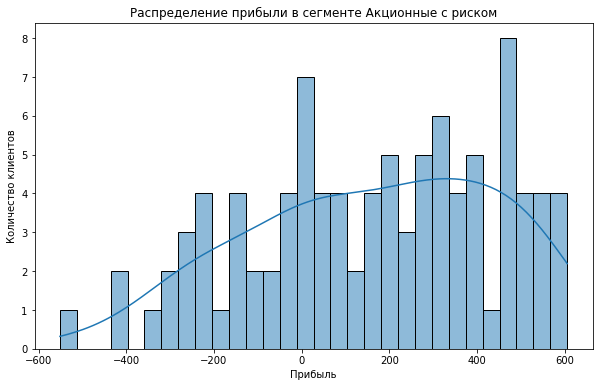

In [207]:
# Распределение прибыли (profit)
plt.figure(figsize=(10,6))
sns.histplot(df_promo['profit'], bins=30, kde=True)
plt.title('Распределение прибыли в сегменте Акционные с риском')
plt.xlabel('Прибыль')
plt.ylabel('Количество клиентов')
plt.show()

In [208]:
# Группируем по категории и считаем количество клиентов и средние показатели
category_summary = df_promo.groupby('поп_категория').agg({
    'id': 'count',
    'текущ_мес_money': 'mean',
    'предыдущ_мес_money': 'mean',
    'profit': 'mean'
}).rename(columns={'id': 'count',
                   'текущ_мес_money': 'avg_revenue_current_month',
                   'предыдущ_мес_money': 'avg_revenue_prev_month',
                   'profit': 'avg_profit'}).reset_index()

display(category_summary.sort_values(by='count', ascending=False))

,поп_категория,count,avg_revenue_current_month,avg_revenue_prev_month,avg_profit
5,Товары для детей,35,4766.080000,4618.214286,147.865714
1,Косметика и аксесуары,19,5433.510526,5240.973684,192.536842
0,Домашний текстиль,18,5400.400000,5273.722222,126.677778
2,Кухонная посуда,15,5571.940000,5362.466667,209.473333
4,Техника для красоты и здоровья,6,4516.683333,4424.166667,92.516667
3,Мелкая бытовая техника и электроника,3,5496.000000,5257.666667,238.333333


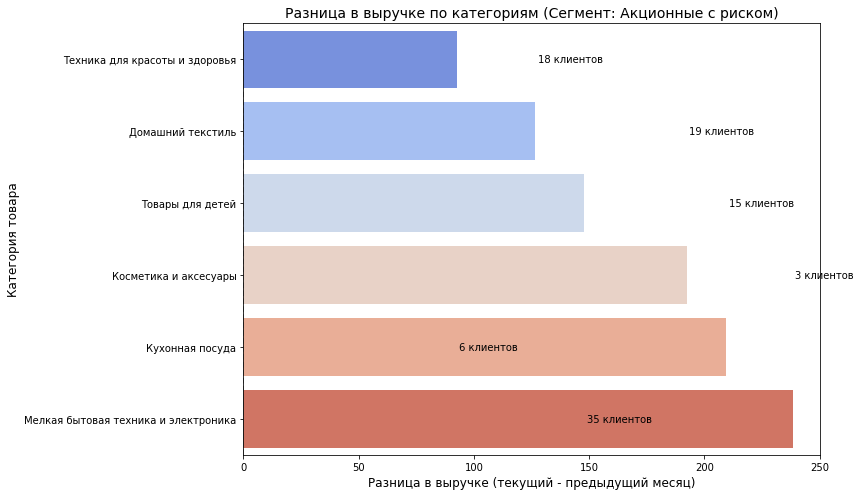

In [209]:
# горизонтального столбчатого графика, который показывает разницу в выручке (revenue_diff) между 
# текущим и предыдущим месяцами по категориям товаров в сегменте 'Акционные с риском'
# Группировка по категориям
df_cat_revenue = (
    df_promo.groupby('поп_категория')
    .agg({
        'текущ_мес_money': 'mean',
        'предыдущ_мес_money': 'mean',
        'profit': 'mean',
        'id': 'count'
    })
    .rename(columns={
        'текущ_мес_money': 'avg_revenue_current_month',
        'предыдущ_мес_money': 'avg_revenue_prev_month',
        'profit': 'avg_profit',
        'id': 'count'
    })
    .reset_index()
)

# Разница в выручке
df_cat_revenue['revenue_diff'] = df_cat_revenue['avg_revenue_current_month'] - df_cat_revenue['avg_revenue_prev_month']

# Сортировка по разнице
df_cat_revenue = df_cat_revenue.sort_values(by='revenue_diff', ascending=True)

# Построение графика
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    data=df_cat_revenue,
    x='revenue_diff',
    y='поп_категория',
    palette='coolwarm'
)

# Подписи количества клиентов рядом с категориями
for i, row in df_cat_revenue.iterrows():
    barplot.text(
        row['revenue_diff'] + 1,  # смещение подписи немного вправо от конца бара
        i,
        f"{row['count']} клиентов",
        va='center',
        fontsize=10,
        color='black'
    )

plt.xlabel('Разница в выручке (текущий - предыдущий месяц)', fontsize=12)
plt.ylabel('Категория товара', fontsize=12)
plt.title('Разница в выручке по категориям (Сегмент: Акционные с риском)', fontsize=14)
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

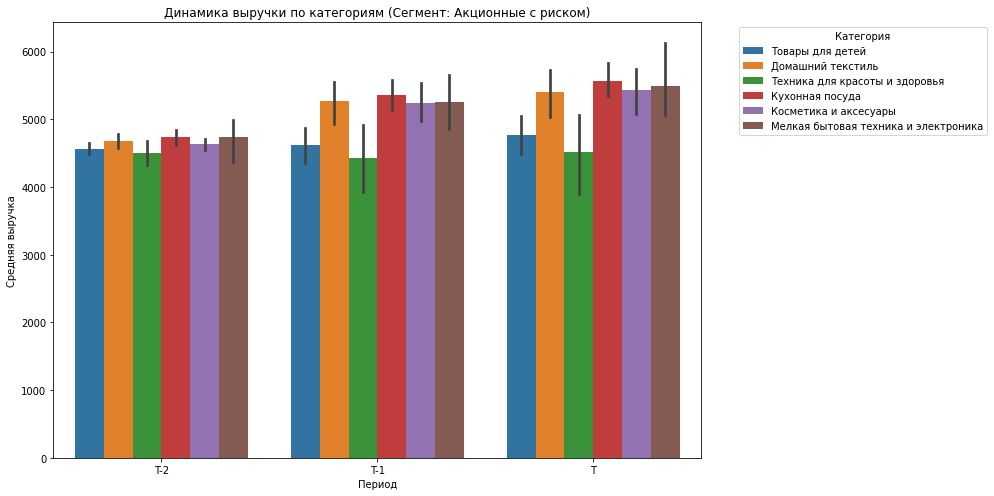

In [210]:
# Преобразуем df_promo в "long format" для построения графика
df_long = df_promo.melt(
    id_vars=['поп_категория'],
    value_vars=['препредыдущ_мес_money', 'предыдущ_мес_money', 'текущ_мес_money'],
    var_name='Период',
    value_name='Выручка'
)

# Переименуем для красоты
df_long['Период'] = df_long['Период'].map({
    'препредыдущ_мес_money': 'T-2',
    'предыдущ_мес_money': 'T-1',
    'текущ_мес_money': 'T'
})

# Строим график
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.barplot(data=df_long, x='Период', y='Выручка', hue='поп_категория')
plt.title('Динамика выручки по категориям (Сегмент: Акционные с риском)')
plt.ylabel('Средняя выручка')
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


На графике сегмента "Акционные с риском" видно, что выручка увеличилась у таких категорий как: "Мелкая бытовая техника и электроника", "Косметика и аксесуары", "Кухонная посуда" и "Домашний текстиль". Причем рост идет 2 месяца подряд. "Товары для детей" и "Техника для красоты и здоровья" последние три месяца находятся примерно на одном уровне.

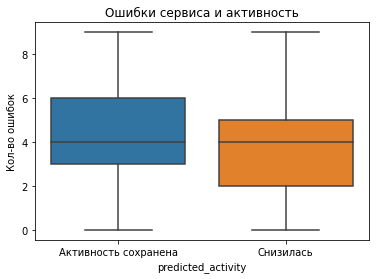

In [211]:
# Ошибки на сайте: сравнение активных и снижающих активность клиентов
# Среднее число ошибок по predicted_activity
df_merged.groupby('predicted_activity')['ошибка_сервиса'].mean()

sns.boxplot(data=df_merged, x='predicted_activity', y='ошибка_сервиса')
plt.xticks([0, 1], ['Активность сохранена', 'Снизилась'])
plt.title('Ошибки сервиса и активность')
plt.ylabel('Кол-во ошибок')
plt.show()

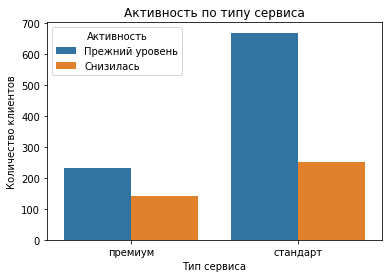

In [212]:
# Влияние премиум-подписки на активность
sns.countplot(data=df_merged, x='тип_сервиса', hue='predicted_activity')
plt.title('Активность по типу сервиса')
plt.xlabel('Тип сервиса')
plt.ylabel('Количество клиентов')
plt.legend(title='Активность', labels=['Прежний уровень', 'Снизилась'])
plt.show()

In [213]:
# Выгода от акций
#Сравним прибыль акционных клиентов:

# Прибыль по категориям
df_promo.groupby('поп_категория')['profit'].mean().sort_values(ascending=False)

поп_категория
Мелкая бытовая техника и электроника    238.333333
Кухонная посуда                         209.473333
Косметика и аксесуары                   192.536842
Товары для детей                        147.865714
Домашний текстиль                       126.677778
Техника для красоты и здоровья           92.516667
Name: profit, dtype: float64

</font><font color='Blue'><b>Вывод по сегменту "Акционные с риском"</b></font><br>
Выбор группы для дополнительного исследования и рекомендации. Я выбрал сегмент "Акционные с риском" 
— клиенты с высокой долей акционных покупок и прогнозом снижения активности. Причина выбора: Это 
группа с риском потерять покупателей — важно удержать их. Они делают много акционных покупок — 
значит чувствительны к скидкам, но могут потерять интерес без дополнительных стимулов. Средний 
доход и прибыль у них ниже, чем у других сегментов, — потенциал роста есть.<br>

На графике "Динамика выручки по категориям сегмента Акционные с риском" видно, что выручка увеличилась у таких категорий как: <br>
"Мелкая бытовая техника и электроника", "Косметика и аксесуары", "Кухонная посуда" и 
"Домашний текстиль". Причем рост идет 2 месяца подряд. "Товары для детей" и 
"Техника для красоты и здоровья" последние три месяца находятся примерно на одном уровне.<br>

Исходя из этого можем предположить, что с учетом того, данную группу легче всего заинтересовать скидками и акциями, то необходимо сделать акции для этой группы на товары категорий "Товары для детей" и "Техника для красоты и здоровья". Так как в рассматриваемой группе эти товары находятся ниже других категорий по выручке.<br>

"Ошибки сервиса" не оказывает явного воздействия на группу "Акционные с риском".
"Тип сервиса". На графике "Активность по типу сервиса" видно, что в группе "Акционные с риском" количество подписки "премиум" превосходит по соотношению в сравнении с группой "Прежний уровень". То есть группу "Акционные с риском" перестала интересовать подписка премиум. Нужно обратить на это внимание и проработать вовлеченность подписки на рассматриваемую группу.<br>

</font><font color='Blue'><b>Общий вывод V1</b></font><br>
Описание задачи:<br>
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.<br>
Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.<br>

Данные и предобработка:<br>
Проведена предобработка. Обработаны дубликаты, пропуски. Типы данных приведены в соответствие со значениями.<br>

Исследовательский анализ:<br>
Группа "Снизилась" имеет следующее распределение от наибольшего к наименьшему: "Товары для детей", "Косметика и аксесуары", "Домашний текстиль", "Кухонная посуда", "Техника для красоты и здоровья" и "Мелкая бытовая техника и электроника"<br>
Группа "Прежний уровень" имеет следующее распределение от наибольшего к наименьшему: "Товары для детей", "Домашний текстиль", "Мелкая бытовая техника и электроника", "Техника для красоты и здоровья", "Косметика и аксесуары" и "Кухонная посуда".<br>

Различия в соотношении групп ("Снизилась" - 498, "Прежний уровень" - 802) следующие: Доля группы "Снизилась" преобладает в категориях "Косметика и аксесуары" и "Кухонная посуда".<br>
Доля группы "Снизилась" явно уступает в категории "Мелкая бытовая техника и электроника".<br>
В остальных категориях: "Товары для детей", "Домашний текстиль" и "Техника для красоты и здоровья", распределение примерно соответствует доле каждой группы.<br>

Портрет покупателя, снижающего активность:<br>
Количественные особенности:<br>
Меньше маркетинговых касаний за 6 месяцев (маркет_актив6мес): На менее активных клиентов приходилось меньше коммуникаций.<br>
Чуть ниже маркетинг в текущем месяце (маркет_актив_тек_мес): Снижение активности может быть связано с ослаблением актуального маркетинга.<br>
Дольше пользуются сервисом (длительность): Это не новички — уходят даже те, кто был лоялен долгое время.<br>
Больше доля акционных покупок (акцион_покупки): Чувствительны к скидкам — возможен интерес только к акциям.<br>
Меньше категорий в среднем за визит (ср_просм_кат_за_визит) и меньше страниц за визит (страниц_за_визит): Меньшая вовлечённость и интерес к ассортименту.
Больше неоплаченных товаров (неоплач_прод_шт_квартал): Возможны проблемы с оформлением заказов или неудовлетворенность.<br>

Категориальные особенности:<br>
Преобладание тарифа "премиум" среди снижающих активность: Возможно, ожидания от тарифа не оправданы. Популярные категории у снижающих активность: "Косметика и аксессуары", "Кухонная посуда". Вероятно, менее регулярные или менее необходимые товары.<br>
Недостаточное присутствие в категории "Мелкая бытовая техника и электроника": Те, кто покупает технику, остаются активными дольше.<br>

Вывод:<br>
Покупатели, у которых снизилась активность, чаще:<br>
Меньше взаимодействуют с маркетингом,<br>
Реже просматривают товары,<br>
Чувствительны к акциям,<br>
Столкнулись с неудовлетворительным опытом (брошенные корзины),<br>
Оформляли покупки в "премиум" сегменте, но не получили ценности.<br>

Поиск модели:<br>
На основе пайплайна нашли лучшую модель:<br>
SVC(C=1, probability=True)<br>
Лучшее F1 на кросс-валидации: 0.8206403550113051<br>
F1 на тесте: 0.8789237668161434<br>

Вывод по сегменту "Акционные с риском":<br>
На графике "Динамика выручки по категориям сегмента Акционные с риском" видно, что выручка увеличилась у таких категорий как: "Мелкая бытовая техника и электроника", "Косметика и аксесуары", "Кухонная посуда" и "Домашний текстиль". Причем рост идет 2 месяца подряд. "Товары для детей" и "Техника для красоты и здоровья" последние три месяца находятся примерно на одном уровне.<br>

Исходя из этого можем предположить, что с учетом того, данную группу легче всего заинтересовать скидками и акциями, то необходимо сделать акции для этой группы на товары категорий "Товары для детей" и "Техника для красоты и здоровья". Так как в рассматриваемой группе эти товары находятся ниже других категорий по выручке.<br>

"Ошибки сервиса" не оказывает явного воздействия на группу "Акционные с риском". "Тип сервиса". На графике "Активность по типу сервиса" видно, что в группе "Акционные с риском" количество подписки "премиум" превосходит по соотношению в сравнении с группой "Прежний уровень". То есть группу "Акционные с риском" перестала интересовать подписка премиум. Нужно обратить на это внимание и проработать вовлеченность подписки на рассматриваемую группу.<br>

